# Projet 4 : Prédiction de la consommation d'électricité
## Exploration
### Objectifs : - prédire les émissions de CO2 et la consommation totale d’énergie (2 variables à prédire)
### Objectif : - évaluer la pertinence de la variable ENERGY STAR Score
### Note à Seattle, le record en nombre d'étages c'est 76 selon wikipedia

### Notes : 
    - Après lecture du dictionnaire des données, les variables redondantes utilisées spour faire des l'imputation puis seront retirées (expression dans une autre unité).
    - Nos variables d'intérets sont: ENERGYSTARScore, TotalGHGEmissions, SiteEnergyUse(kBtu)

In [1]:
#librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

In [3]:
#Importations des jeux de données
df_2015 = pd.read_csv("2015_building_energy_benchmarking.csv")
df_2016 = pd.read_csv("2016_building_energy_benchmarking.csv")

In [4]:
#Dimmensions des données
df_2015.shape , df_2016.shape
# 42 variables et 3340 lignes en 2015
# 46 variables et 3376 lignes en 2016
#On a des différences de niveau du nombre de colonnes

((3340, 42), (3376, 46))

In [5]:
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
0,21548,2015,Multifamily LR (1-4),Low-Rise Multifamily,PUGET VISTA APTS,1992200030,"411 W REPUBLICAN ST\nSEATTLE, WA 98119\n(47.62...",7,MAGNOLIA / QUEEN ANNE,1967,1,4.0,40086,6133,33953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not Compliant,NaN
1,26379,2015,NonResidential,Hotel,GEORGETOWN INN,6920700025,"6100 CORSON AVE S\nSEATTLE, WA 98108\n(47.5477...",2,GREATER DUWAMISH,1992,1,3.0,22452,0,22452,Hotel,Hotel,22452.0,NaN,NaN,NaN,NaN,NaN,78.0,60.3,61.5,118.2,122.0,1354219.0,1381137.0,0.0,172881.0,589893.0,7644.0,764350.0,0.0,44.71,1.88,No,NaN,Compliant,NaN
2,26713,2015,Multifamily HR (10+),High-Rise Multifamily,QUINTESSA APTS,5247800955,"201 YESLER WAY\nSEATTLE, WA 98104\n(47.6015502...",7,DOWNTOWN,2007,1,13.0,90959,0,90959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,48.0,52.2,115.4,126.2,4361755.0,4748161.0,0.0,829363.0,2829904.0,15320.0,1531968.0,0.0,101.09,0.98,No,NaN,Compliant,NaN
3,102,2015,NonResidential,Hotel,MARRIOTT RESIDENCE INN,1984200065,"800 FAIRVIEW AVE N\nSEATTLE, WA 98109\n(47.626...",3,LAKE UNION,1990,1,7.0,282863,44766,238097,"Hotel, Parking",Hotel,235788.0,Parking,51537.0,NaN,NaN,NaN,40.0,79.9,85.3,178.1,186.6,18829136.0,20123722.0,0.0,3117920.0,10638785.0,81908.0,8190794.0,0.0,509.18,1.64,No,NaN,Compliant,NaN
4,503,2015,NonResidential,Supermarket/Grocery Store,RESTAURANT DEPOT,1824049003,"3670 E MARGINAL WAY S\nSEATTLE, WA 98134\n(47....",2,GREATER DUWAMISH,2008,1,1.0,63225,0,63225,Supermarket/Grocery Store,Supermarket/Grocery Store,63225.0,NaN,NaN,NaN,NaN,NaN,100.0,104.7,104.7,328.8,328.8,6619941.0,6619941.0,0.0,1940194.0,6620217.0,0.0,0.0,0.0,46.15,0.28,No,NaN,Compliant,NaN


In [6]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


#### Mise en conformités des données

In [7]:
# liste des variables de 2015 qui ne sont pas présentes en 2016
[a for a in df_2015.columns if a not in df_2016.columns ]

['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment']

In [8]:
#### Après investigation ces varibales exites sous d'autres libebllés

In [9]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
# Harminisation des variables de 2015 avec celles de 2016
df_2015 = df_2015.rename(columns = {"Comment":"Comments","GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions", "GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity"})
df_2016['Location'] = df_2016.Address+str(' ')+df_2016.City+str(' ')+df_2016.State+str(' ')+str(df_2016.ZipCode)

In [11]:
# liste des variables de 2015 qui ne sont pas présentes en 2016
[a for a in df_2016.columns if a not in df_2015.columns ]

['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']

In [12]:
### Pour ces variables on aura des NA en 2015, on va fera des imputations avec les valeurs de 2016 pour le meme Id: OSEBuildingID

In [13]:
#Suppression des doublons et concaténation des 2 jeux de données
df_2015.drop_duplicates(inplace=True)
df_2016.drop_duplicates(inplace=True)
df_0 = df_2015.append(df_2016)

In [14]:
#Vérification des dimensions
df_0.shape, df_2015.shape, df_2016.shape

((6716, 48), (3340, 42), (3376, 47))

In [15]:
#Vérifications de la fiabilté de l'ID.
len(df_0.OSEBuildingID.unique())

3432

In [16]:
#Nombre maxi de présence d'un ID
df_0.OSEBuildingID.value_counts().unique()

array([2, 1], dtype=int64)

#### Notes: L'id OSEBuildingID est putôt fiable. On a au plus 2 occurences pour un ID. ON peut se servire de cette varible pour faire des imputations sur les variables présentent en 2016, mais non en 2015

In [17]:
#Check des variables non présentes en 2015 mais présentes en 2016
df_0[df_0.DataYear==2015][['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']].head()

,Address,City,State,ZipCode,Latitude,Longitude
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Impuation des variables présentent en 2016, mais non en 2015 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']
sub_list = ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']
list_double_id = df_0.OSEBuildingID.value_counts().index[df_0.OSEBuildingID.value_counts()>1]

df_0.loc[(df_0['OSEBuildingID'].isin(list_double_id)) & (df_0['DataYear']==2015), sub_list] = df_0.loc[(df_0['OSEBuildingID'].isin(list_double_id)) & (df_0['DataYear']==2016), sub_list] 

In [19]:
#Vérification
df_0[df_0.DataYear==2015][['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude']].head()
#Impuation réussie!

,Address,City,State,ZipCode,Latitude,Longitude
0,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799
1,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393
2,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810
3,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664
4,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047


In [20]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   Location                         6716 non-null   object 
 7   CouncilDistrictCode              6716 non-null   int64  
 8   Neighborhood                     6716 non-null   object 
 9   YearBuilt                        6716 non-null   int64  
 10  NumberofBuildings                6708 non-null   float64
 11  NumberofFloors                   6708 non-null   float64
 12  PropertyGFATotal    

### Notes : 
    - Après lecture du dictionnaire des données, les variables redondantes utilisées spour faire des l'imputation puis seront retirées (expression dans une autre unité).
    - Nos variables d'intérets sont: ENERGYSTARScore, TotalGHGEmissions, SiteEnergyUse(kBtu)

In [21]:
# Variables à supprimer
to_del = ['Electricity(kWh)', 'NaturalGas(therms)','SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'GHGEmissionsIntensity']
df_0 = df_0.drop(to_del, axis=1)

In [22]:
df_0.shape
# 41 variables

(6716, 40)

In [23]:
#Taux de valeur manquantes pour chaque variable
(df_0.isna().sum(axis=0)*100/df_0.shape[0]).sort_values(ascending=False)

Comments                           99.806432
Outlier                            98.272781
YearsENERGYSTARCertified           96.590232
ThirdLargestPropertyUseTypeGFA     82.787373
ThirdLargestPropertyUseType        82.787373
SecondLargestPropertyUseTypeGFA    51.786778
SecondLargestPropertyUseType       51.786778
OtherFuelUse(kBtu)                 50.416915
ENERGYSTARScore                    24.166170
LargestPropertyUseTypeGFA           2.322811
LargestPropertyUseType              2.322811
ListOfAllPropertyUseTypes           2.025015
ZipCode                             1.905896
City                                1.667659
Address                             1.667659
State                               1.667659
Latitude                            1.667659
Longitude                           1.667659
TotalGHGEmissions                   0.282906
SteamUse(kBtu)                      0.282906
Electricity(kBtu)                   0.282906
NaturalGas(kBtu)                    0.282906
SiteEnergy

#### Notes: un dropna supprimera toutes les lignes ou presque car il y a des variables quasiment vides comme outlier, comments

### Analyse des var quant

In [24]:
df_0.select_dtypes(exclude='object').describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,ZipCode,Latitude,Longitude
count,6716.000000,6716.00000,6716.000000,6716.000000,6708.000000,6708.000000,6.716000e+03,6716.000000,6.716000e+03,6.560000e+03,3238.000000,1156.000000,5093.000000,6.701000e+03,6.697000e+03,6.697000e+03,6.697000e+03,3.330000e+03,6697.000000,6588.000000,6604.000000,6604.000000
mean,20867.420488,2015.50268,4.445057,1968.101549,1.071407,4.695736,9.281410e+04,9519.597975,8.329450e+04,7.707936e+04,28074.100153,11262.497750,67.906342,5.194673e+06,2.625076e+05,3.591058e+06,1.311223e+06,7.142301e+03,114.935638,98116.864906,47.624042,-122.334908
std,11878.968174,0.50003,2.123749,33.020391,1.593505,5.476218,1.875062e+05,33868.050881,1.733470e+05,1.681617e+05,53473.984688,26287.655182,27.012124,1.813648e+07,3.704221e+06,1.248728e+07,5.685627e+06,1.962790e+05,478.876573,18.438890,0.047792,0.027216
min,1.000000,2015.00000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,98006.000000,47.499170,-122.414250
25%,19934.000000,2015.00000,3.000000,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.727300e+04,2.501600e+04,4993.000000,2325.000000,52.000000,9.200689e+05,0.000000e+00,6.372730e+05,0.000000e+00,0.000000e+00,9.450000,98105.000000,47.599857,-122.350770
50%,23064.000000,2016.00000,4.000000,1974.000000,1.000000,4.000000,4.400800e+04,0.000000,4.218500e+04,3.953000e+04,10631.000000,5039.000000,75.000000,1.791071e+06,0.000000e+00,1.167735e+06,3.051000e+05,0.000000e+00,33.180000,98115.000000,47.618610,-122.332630
75%,25868.250000,2016.00000,7.000000,1996.000000,1.000000,5.000000,8.943125e+04,0.000000,8.112000e+04,7.417800e+04,26462.000000,10270.000000,90.000000,4.135280e+06,0.000000e+00,2.797320e+06,1.149639e+06,0.000000e+00,91.530000,98122.000000,47.657197,-122.319580
max,50226.000000,2016.00000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,8.269669e+06,16870.980000,98272.000000,47.733870,-122.220966


In [25]:
#sauvegarde data
data = df_0.copy()

In [26]:
#Restauration sauvegarde intermédiaire avant imputation des var quant
df_0 = data.copy()

In [27]:
#Quel est l'édifice qui a 111 batiments? : University of washington seattle campus
df_0[df_0.NumberofBuildings==111]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State,ZipCode,Latitude,Longitude
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,1625049001,NE 45th St & Brooklyn Ave Seattle WA 0 9...,4,NORTHEAST,1900,111.0,0.0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,NaN,873923712.0,84985240.0,657074389.0,0.0,NaN,11140.56,False,NaN,Compliant,NaN,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,47.65644,-122.31041


In [28]:
#Quel édifice a 99 étages?  c'est une erreur 
df_0[df_0.NumberofFloors>76]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State,ZipCode,Latitude,Longitude
1257,21611,2015,NonResidential,Worship Facility,CHINESE BAPTIST CHURCH,2124049098,"5801 BEACON AVE S\nSEATTLE, WA 98108\n(47.5505...",2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,21948,Worship Facility,Worship Facility,21948.0,NaN,NaN,NaN,NaN,NaN,54.0,318205.0000,0.0,318218.0,0.0,0.0,2.22,Yes,NaN,Compliant,NaN,1119 8th Avenue,Seattle,WA,98101.0,47.60901,-122.32994
1359,21611,2016,NonResidential,Worship Facility,Seattle Chinese Baptist Church,2124049098,5801 Beacon Avenue South Seattle WA 0 98...,2,GREATER DUWAMISH,1977,1.0,99.0,21948,0,21948,Worship Facility,Worship Facility,21948.0,NaN,NaN,NaN,NaN,NaN,80.0,326001.1875,0.0,326001.0,0.0,NaN,2.27,False,NaN,Compliant,NaN,5801 Beacon Avenue South,Seattle,WA,98108.0,47.55072,-122.30265


In [29]:
#Correction
df_0.loc[df_0.NumberofFloors>76,'NumberofFloors']=np.nan

In [30]:
#Quels édificies ont des surfaces négatives de parking ou de buldings ou d'électricité ou de totalghgemission
df_0[(df_0['TotalGHGEmissions']<0) | (df_0['PropertyGFAParking']<0) | (df_0['PropertyGFABuilding(s)']<0) | (df_0['Electricity(kBtu)']<0)] 

# IL faut mettre à 0 les superficies négartives et mettre leur contrepartie = total
# L'électricité ou l'émissionghg négatives seront redndu positives sans doutes des erreurs de frappes.

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State,ZipCode,Latitude,Longitude
2102,25530,2015,Multifamily MR (5-9),Mid-Rise Multifamily,WATER'S EDGE,9197580000,"9530 RAINIER AVE S\nSEATTLE, WA 98118\n(47.520...",2,SOUTHEAST,1964,1.0,5.0,20967,-3,20970,Multifamily Housing,Multifamily Housing,20967.0,NaN,NaN,NaN,NaN,NaN,81.0,5.392710e+05,0.0,539293.0,0.0,0.0,3.76,No,NaN,Compliant,NaN,3601 NE 73rd Pl,Seattle,WA,98115.0,47.681490,-122.289150
3131,29551,2015,NonResidential,Small- and Mid-Sized Office,625 5TH AVE S,8809700040,"625 5TH AVE S\nSEATTLE, WA 98104\n(47.59725206...",2,DOWNTOWN,2000,1.0,11.0,68452,-2,68454,"Bank Branch, Office",Office,61665.0,Bank Branch,6787.0,NaN,NaN,"2016, 2015",81.0,3.670298e+06,0.0,3670451.0,0.0,0.0,25.59,No,NaN,Compliant,NaN,6222 NE 74th St,Seattle,WA,98115.0,47.682400,-122.262230
3151,50002,2015,NonResidential,Other,FREEWAY MOTORS UNIVERSITY AUDI,6746701515,"4741 11TH AVE NE\nSEATTLE, WA 98105\n(47.66411...",4,NORTHEAST,2014,1.0,3.0,33648,84198,-50550,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,NaN,NaN,NaN,NaN,1.389553e+06,0.0,1389610.0,0.0,0.0,9.69,No,NaN,Compliant,NaN,507 Maynard Ave S,Seattle,WA,98104.0,47.598010,-122.325440
3172,29788,2015,NonResidential,Small- and Mid-Sized Office,QUEEN ANNE SQUARE WEST (2013),7015350000,"220 W MERCER ST\nSEATTLE, WA 98119\n(47.624968...",7,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,54015,97325,-43310,Office,Office,54015.0,NaN,NaN,NaN,NaN,NaN,65.0,3.455247e+06,0.0,3455391.0,0.0,0.0,24.09,No,NaN,Compliant,NaN,230 Broadway East,Seattle,WA,98102.0,47.620312,-122.320841
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,7234600195,1501 E. Madison St. Seattle WA 0 98101.0...,3,CENTRAL,2013,1.0,6.0,52000,0,52000,Office,Office,48159.0,NaN,NaN,NaN,NaN,NaN,100.0,3.427261e+05,0.0,-115417.0,0.0,NaN,-0.80,False,NaN,Compliant,NaN,1501 E. Madison St.,Seattle,WA,98122.0,47.614320,-122.312570


In [31]:
#Corretion des valeurs
seq = df_0.loc[(df_0['PropertyGFAParking']<0), 'OSEBuildingID']
for i in seq:
    df_0.loc[df_0['OSEBuildingID']==i, 'PropertyGFAParking']=0
    df_0.loc[df_0['OSEBuildingID']==i, 'PropertyGFABuilding(s)']=df_0.loc[df_0['OSEBuildingID']==i, 'PropertyGFATotal']
    
seq = df_0.loc[(df_0['PropertyGFABuilding(s)']<0), 'OSEBuildingID']
for i in seq:
    df_0.loc[df_0['OSEBuildingID']==i, 'PropertyGFABuilding(s)']=0
    df_0.loc[df_0['OSEBuildingID']==i, 'PropertyGFAParking']=df_0.loc[df_0['OSEBuildingID']==i, 'PropertyGFATotal']

df_0.loc[(df_0['TotalGHGEmissions']<0) | (df_0['Electricity(kBtu)']<0), ['TotalGHGEmissions', 'Electricity(kBtu)']]=abs(df_0.loc[(df_0['TotalGHGEmissions']<0) | (df_0['Electricity(kBtu)']<0), ['TotalGHGEmissions', 'Electricity(kBtu)']]) 

In [32]:
### Check après modification
df_0.select_dtypes(exclude='object').describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,ZipCode,Latitude,Longitude
count,6716.000000,6716.00000,6716.000000,6716.000000,6708.000000,6706.000000,6.716000e+03,6716.000000,6.716000e+03,6.560000e+03,3238.000000,1156.000000,5093.000000,6.701000e+03,6.697000e+03,6.697000e+03,6.697000e+03,3.330000e+03,6697.000000,6588.000000,6604.000000,6604.000000
mean,20867.420488,2015.50268,4.445057,1968.101549,1.071407,4.667611,9.281410e+04,9518.675998,8.329542e+04,7.707936e+04,28074.100153,11262.497750,67.906342,5.194673e+06,2.625076e+05,3.591093e+06,1.311223e+06,7.142301e+03,114.935877,98116.864906,47.624042,-122.334908
std,11878.968174,0.50003,2.123749,33.020391,1.593505,5.229186,1.875062e+05,33849.701410,1.733429e+05,1.681617e+05,53473.984688,26287.655182,27.012124,1.813648e+07,3.704221e+06,1.248727e+07,5.685627e+06,1.962790e+05,478.876515,18.438890,0.047792,0.027216
min,1.000000,2015.00000,1.000000,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,0.000000e+00,5.656000e+03,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,98006.000000,47.499170,-122.414250
25%,19934.000000,2015.00000,3.000000,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.727150e+04,2.501600e+04,4993.000000,2325.000000,52.000000,9.200689e+05,0.000000e+00,6.372730e+05,0.000000e+00,0.000000e+00,9.450000,98105.000000,47.599857,-122.350770
50%,23064.000000,2016.00000,4.000000,1974.000000,1.000000,4.000000,4.400800e+04,0.000000,4.218200e+04,3.953000e+04,10631.000000,5039.000000,75.000000,1.791071e+06,0.000000e+00,1.167735e+06,3.051000e+05,0.000000e+00,33.180000,98115.000000,47.618610,-122.332630
75%,25868.250000,2016.00000,7.000000,1996.000000,1.000000,5.000000,8.943125e+04,0.000000,8.112000e+04,7.417800e+04,26462.000000,10270.000000,90.000000,4.135280e+06,0.000000e+00,2.797320e+06,1.149639e+06,0.000000e+00,91.530000,98122.000000,47.657197,-122.319580
max,50226.000000,2016.00000,7.000000,2015.000000,111.000000,76.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,8.269669e+06,16870.980000,98272.000000,47.733870,-122.220966


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


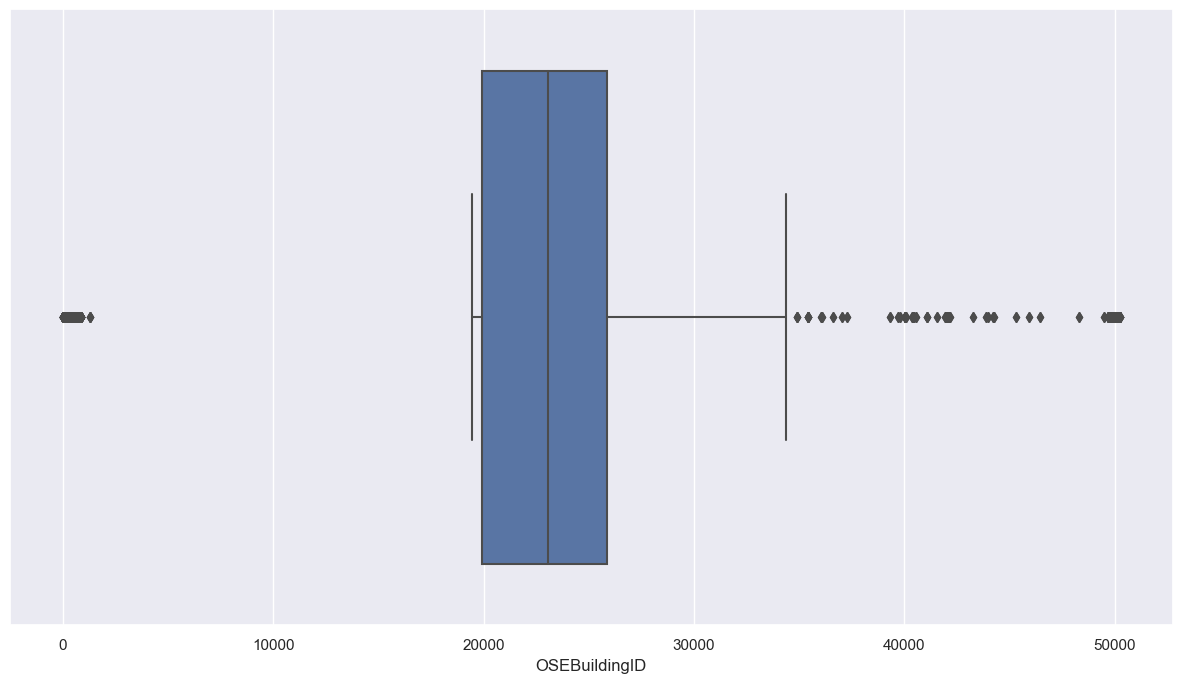

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


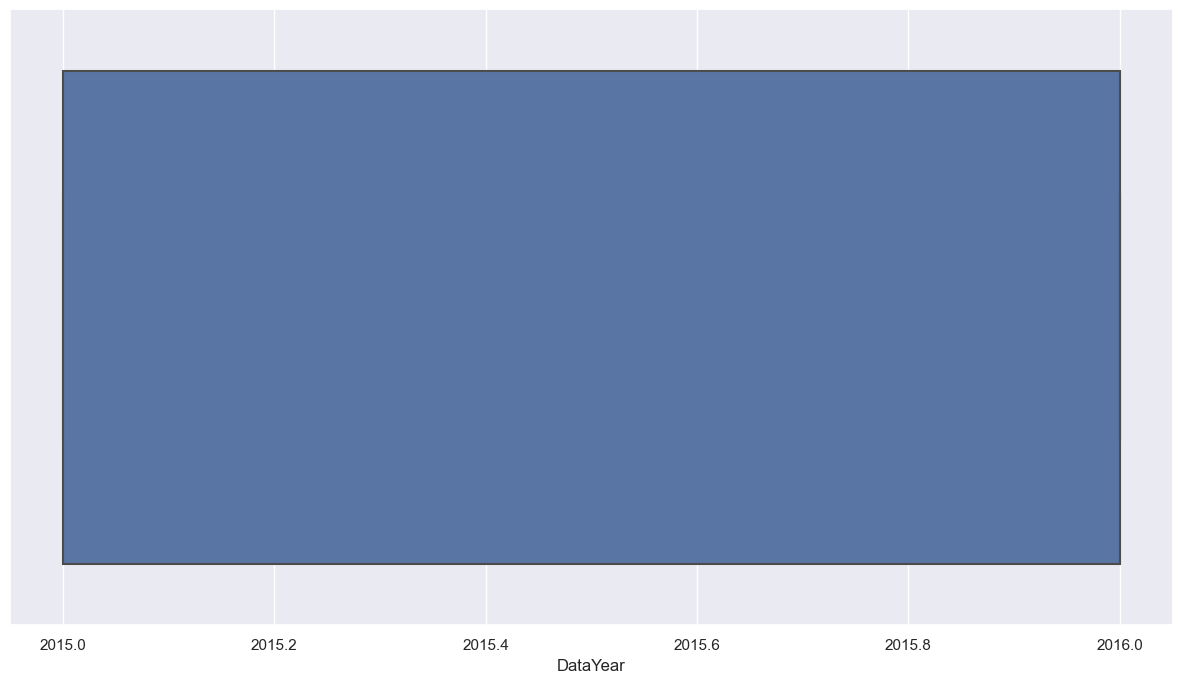

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


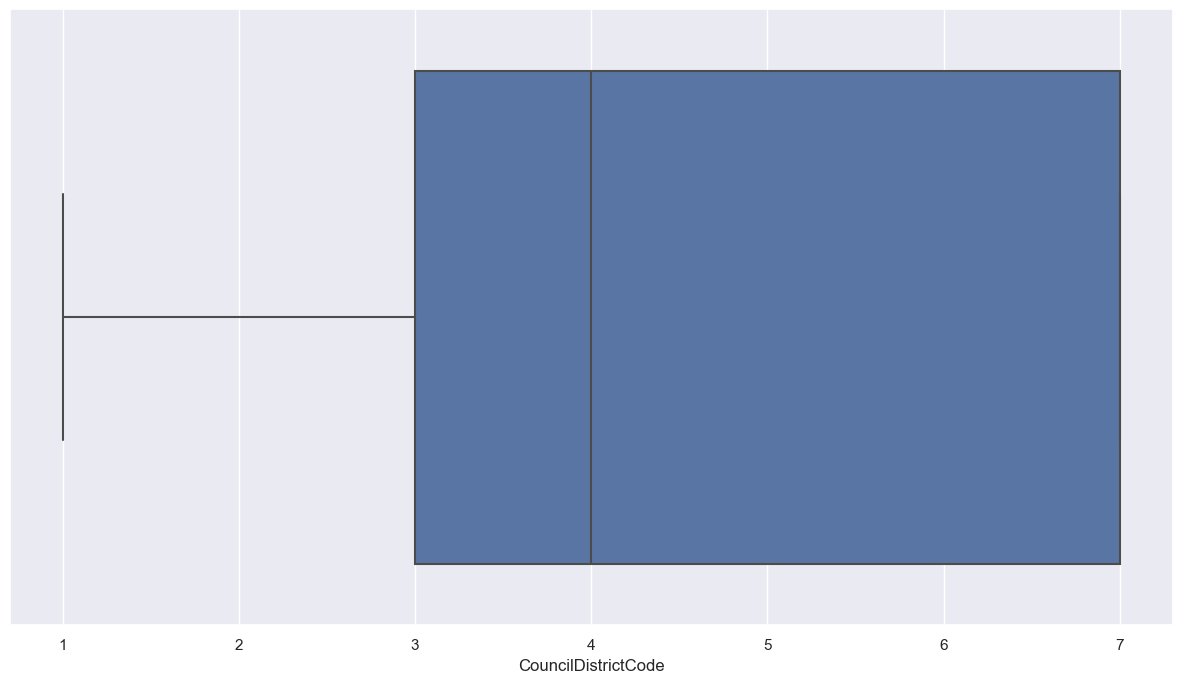

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


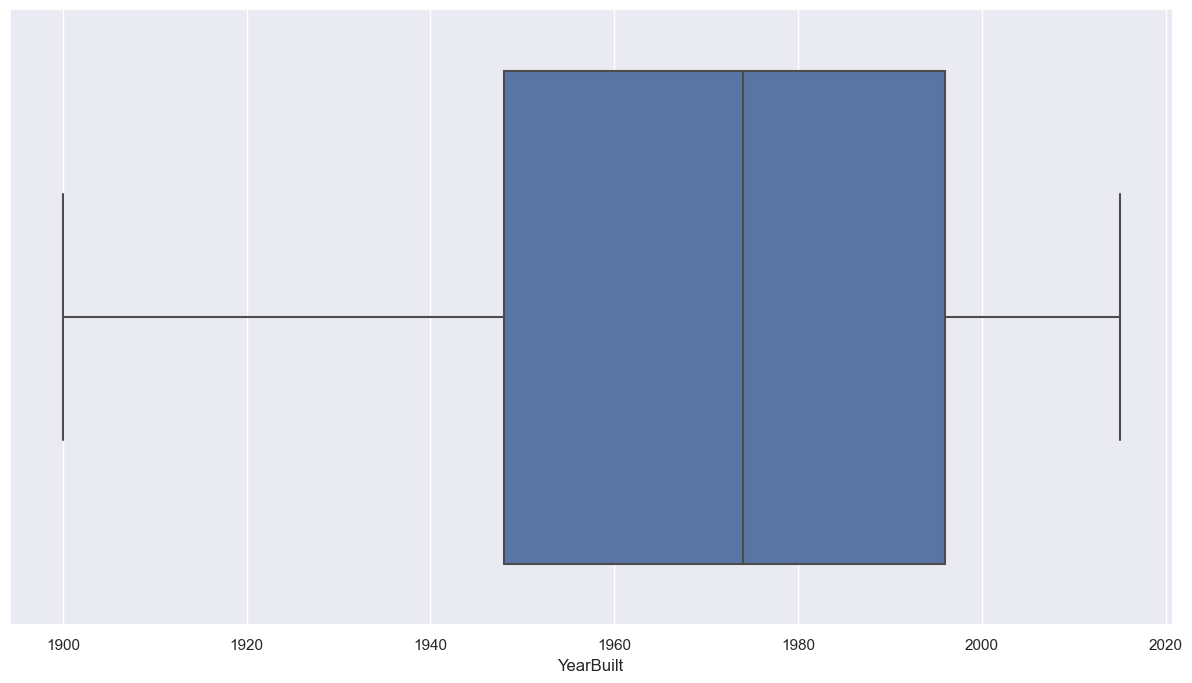

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


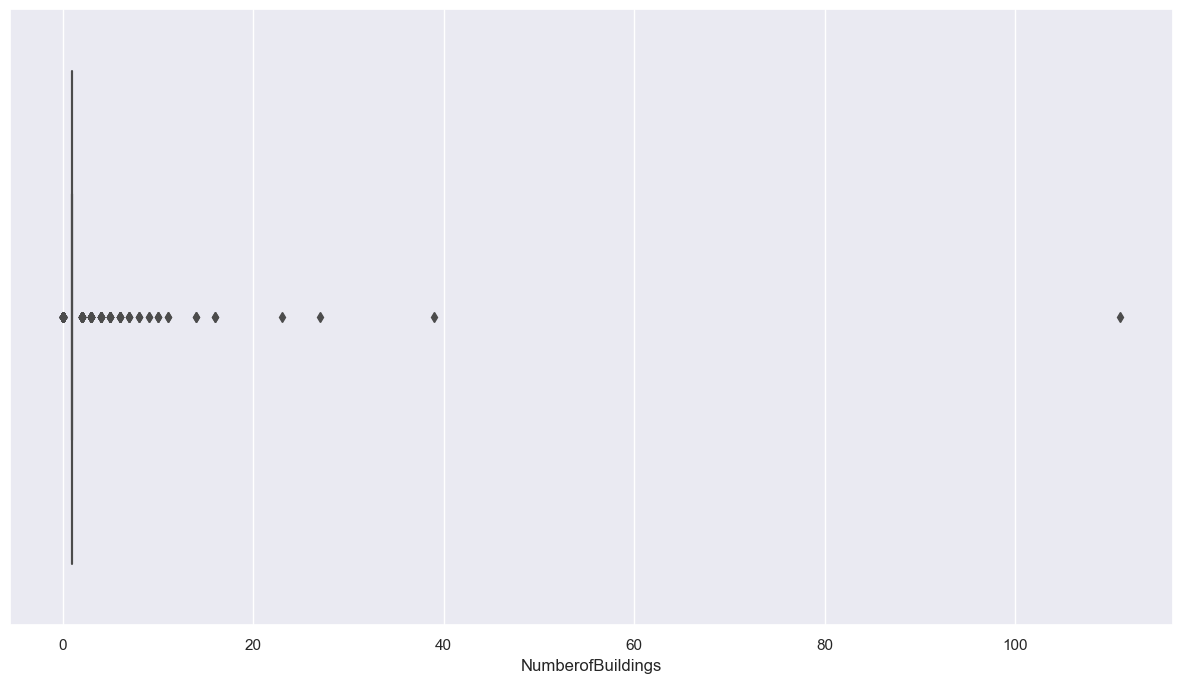

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


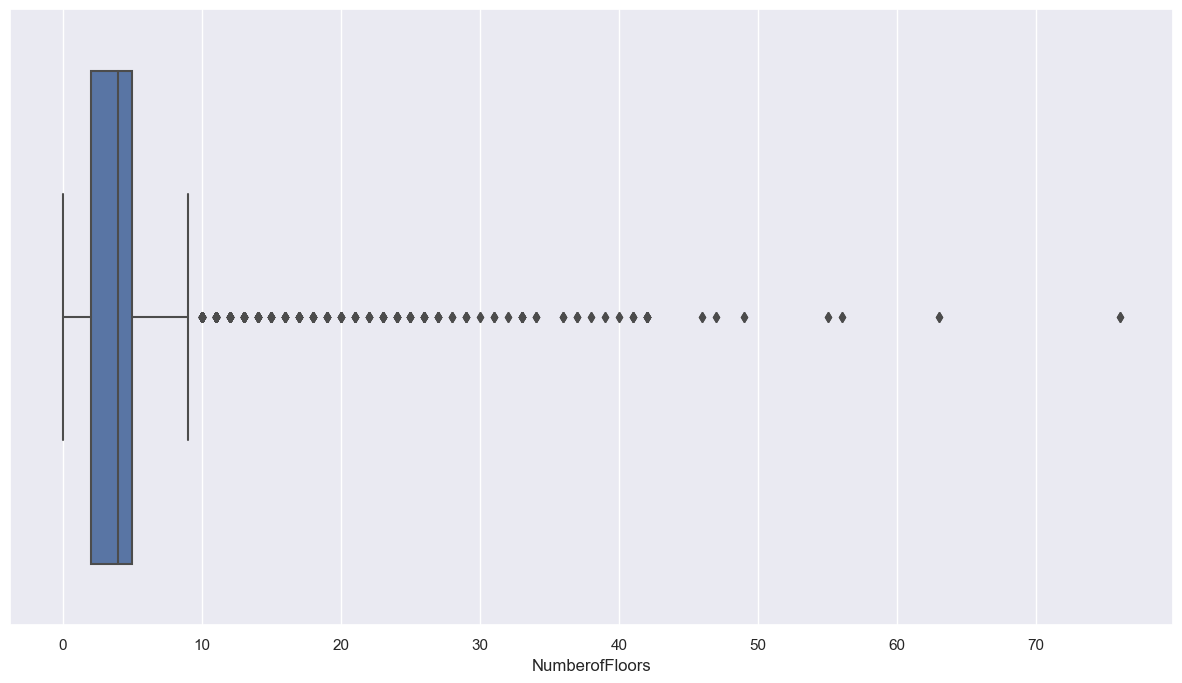

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


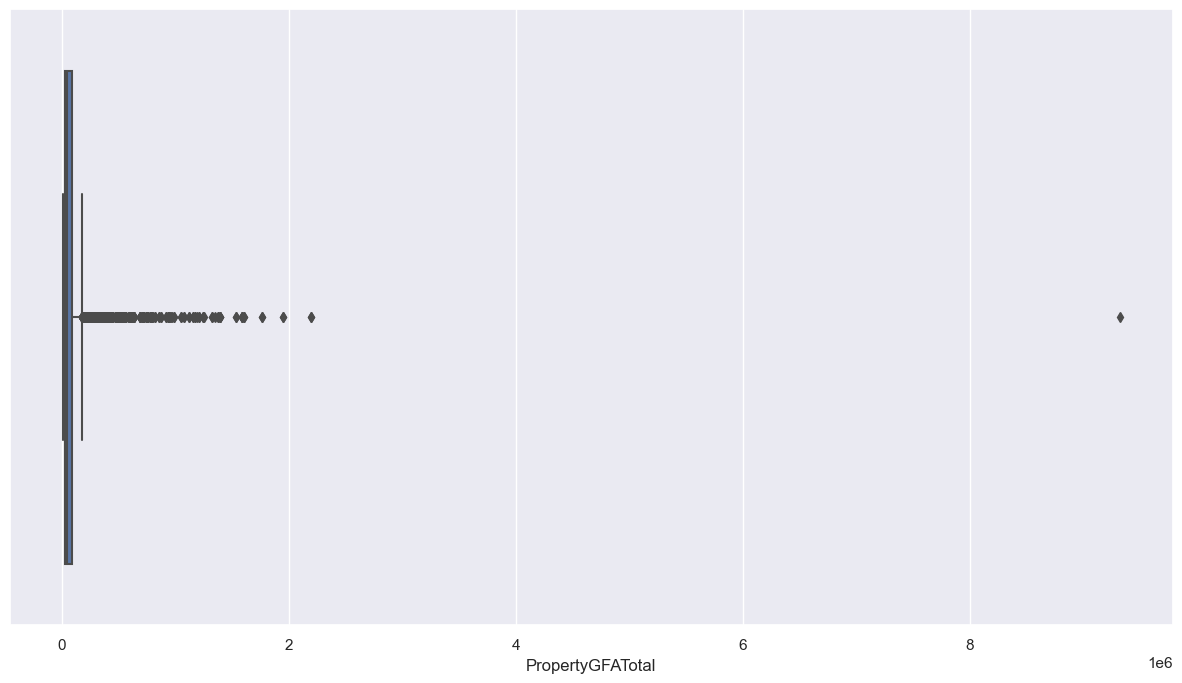

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


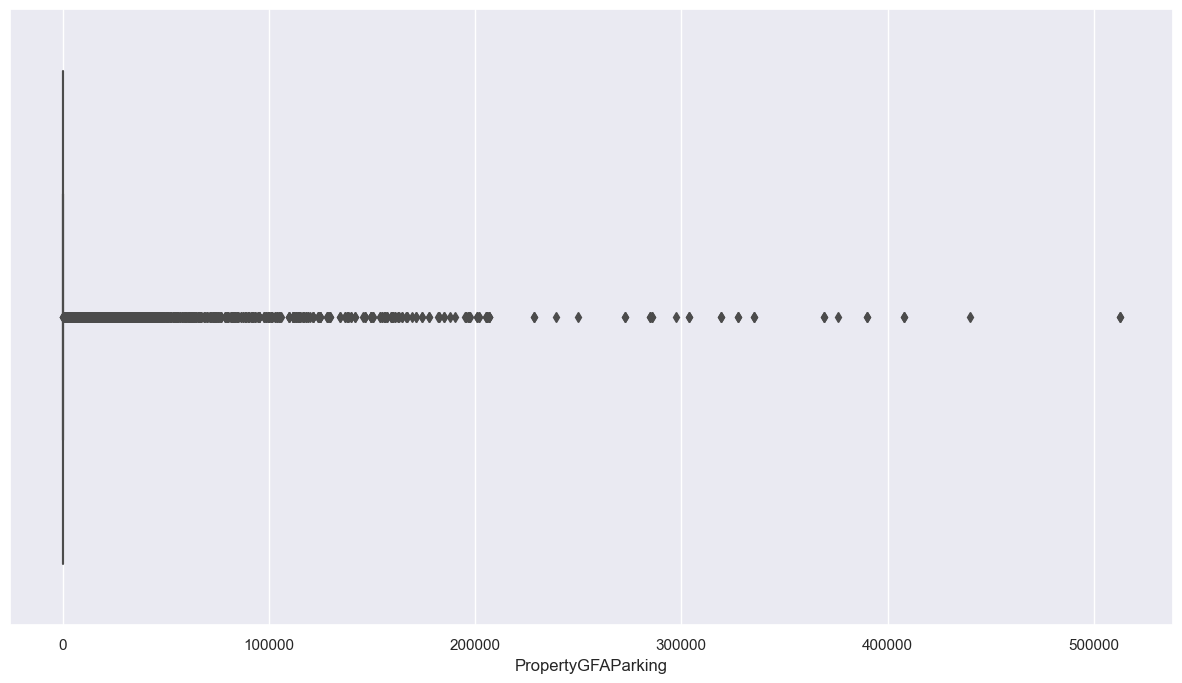

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


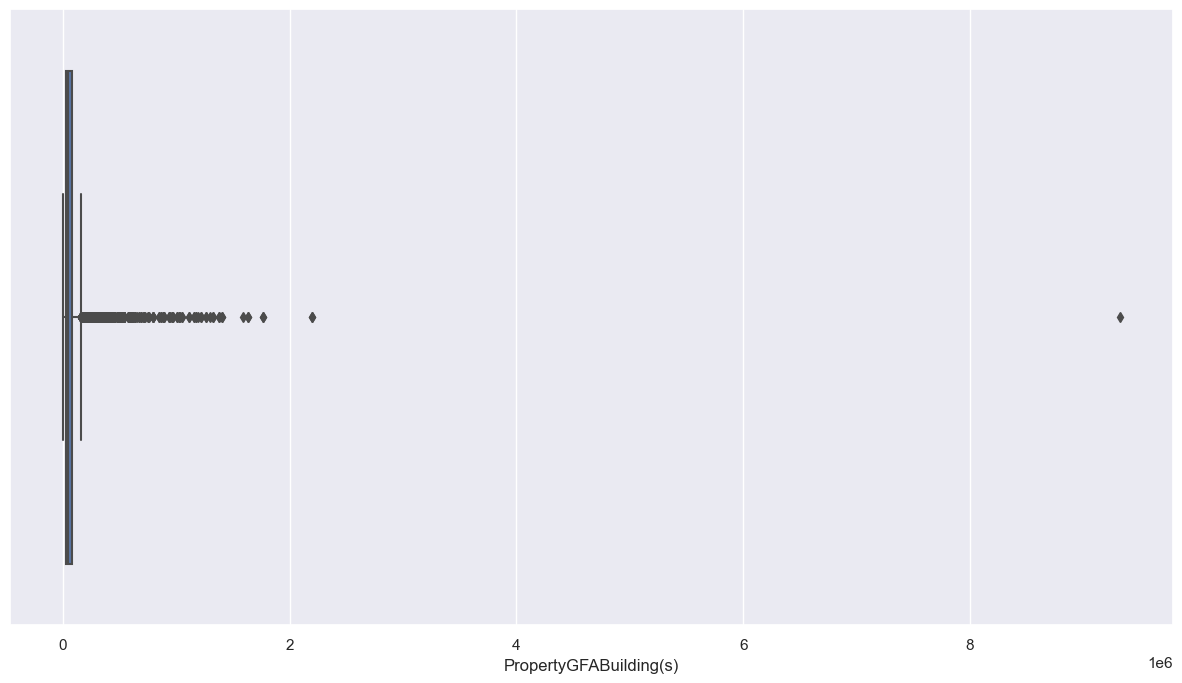

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


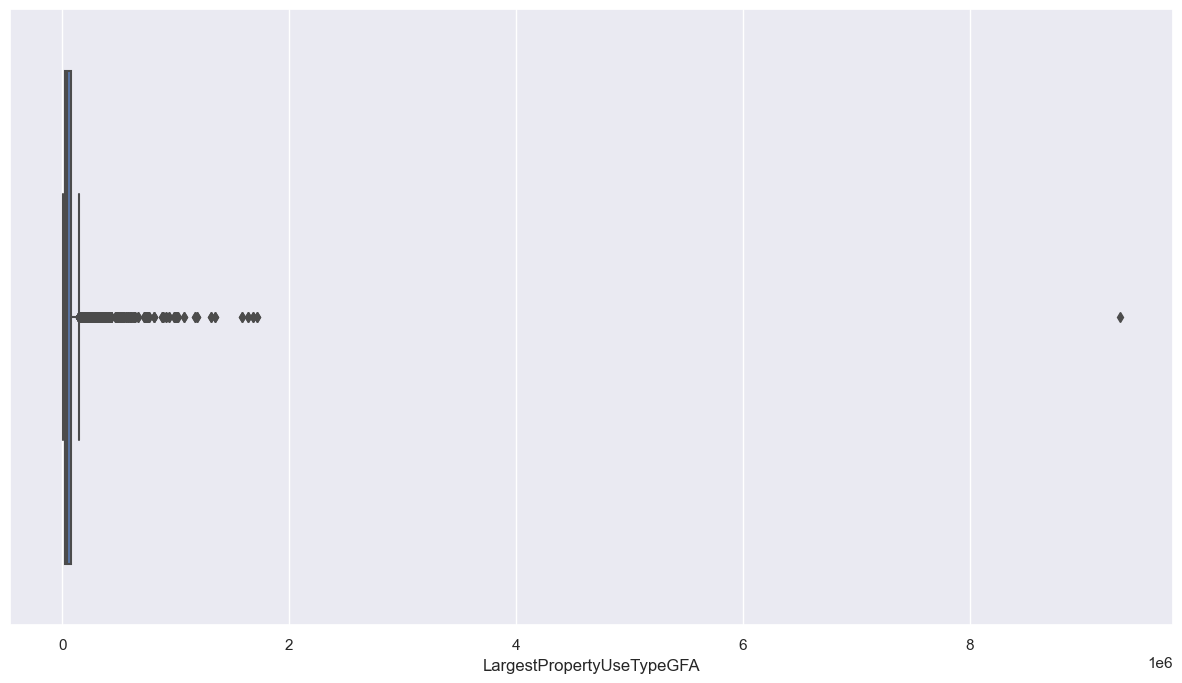

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


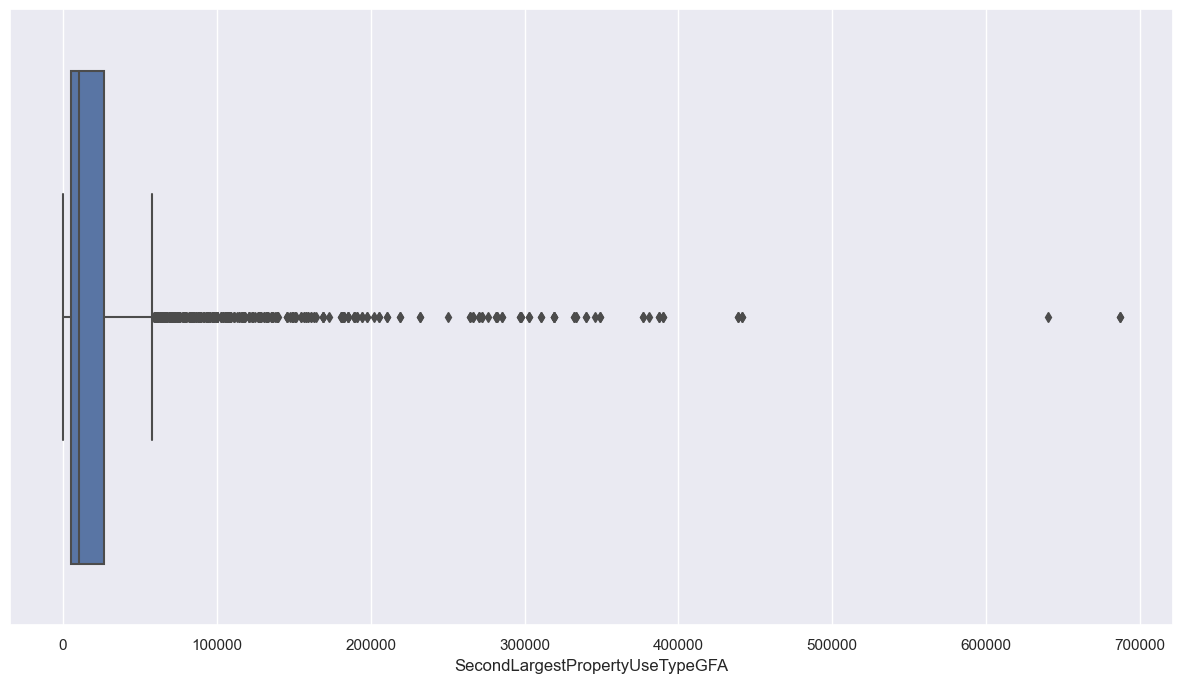

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


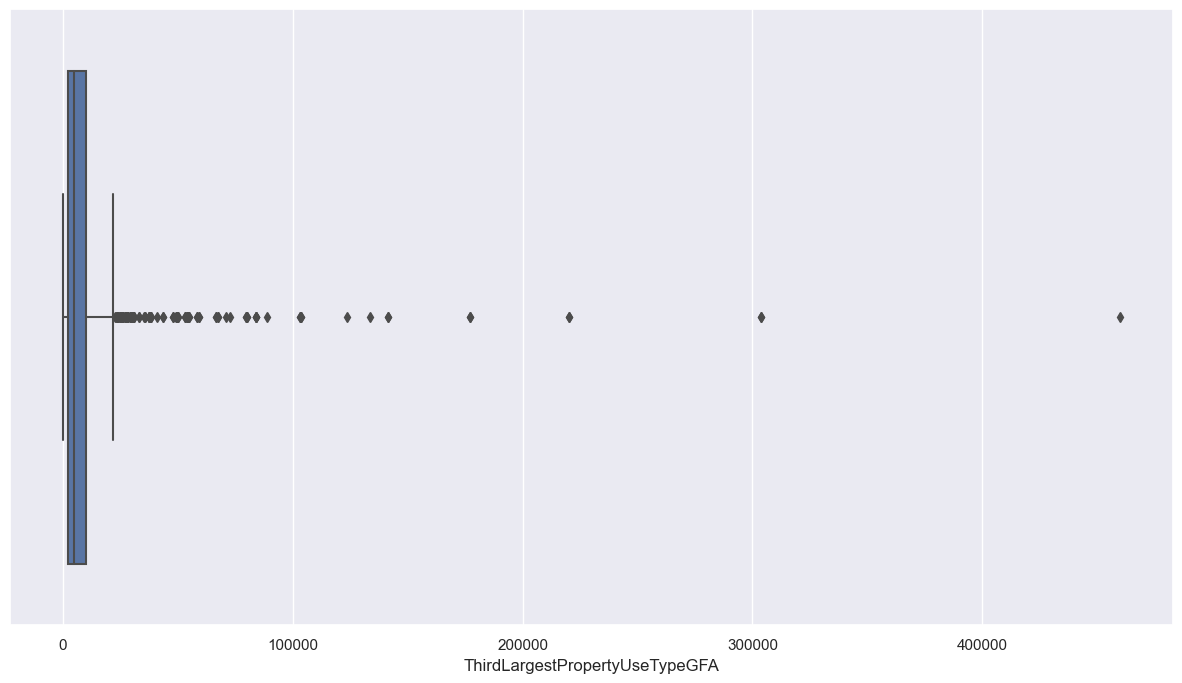

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


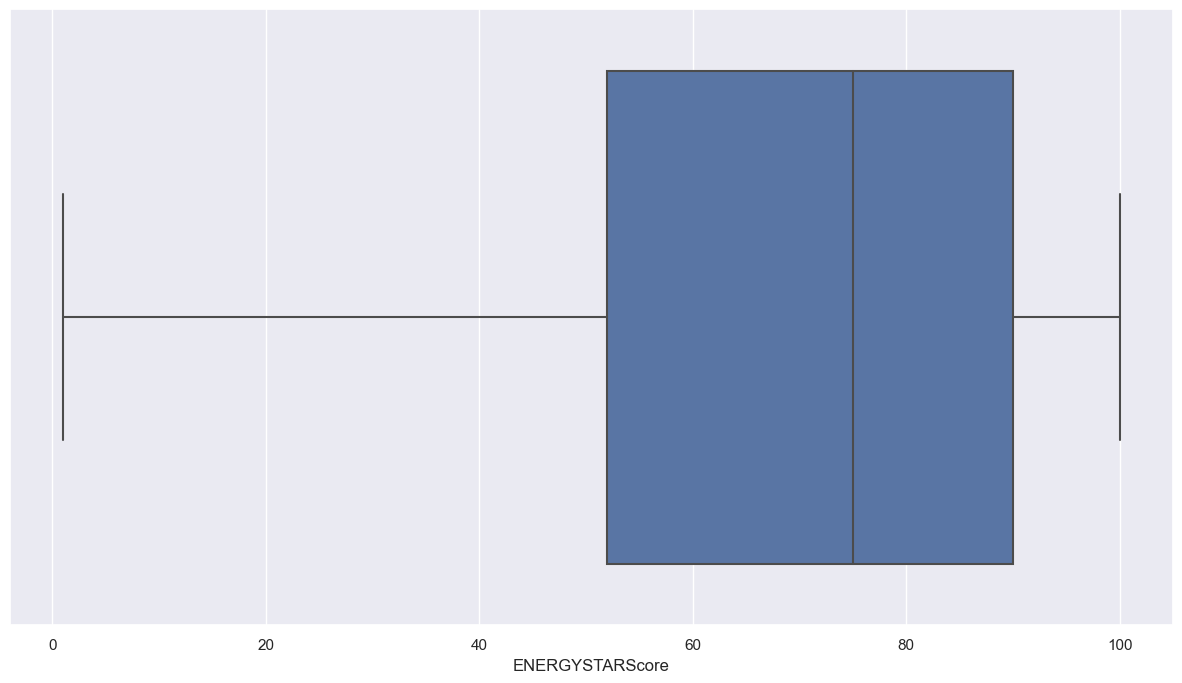

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


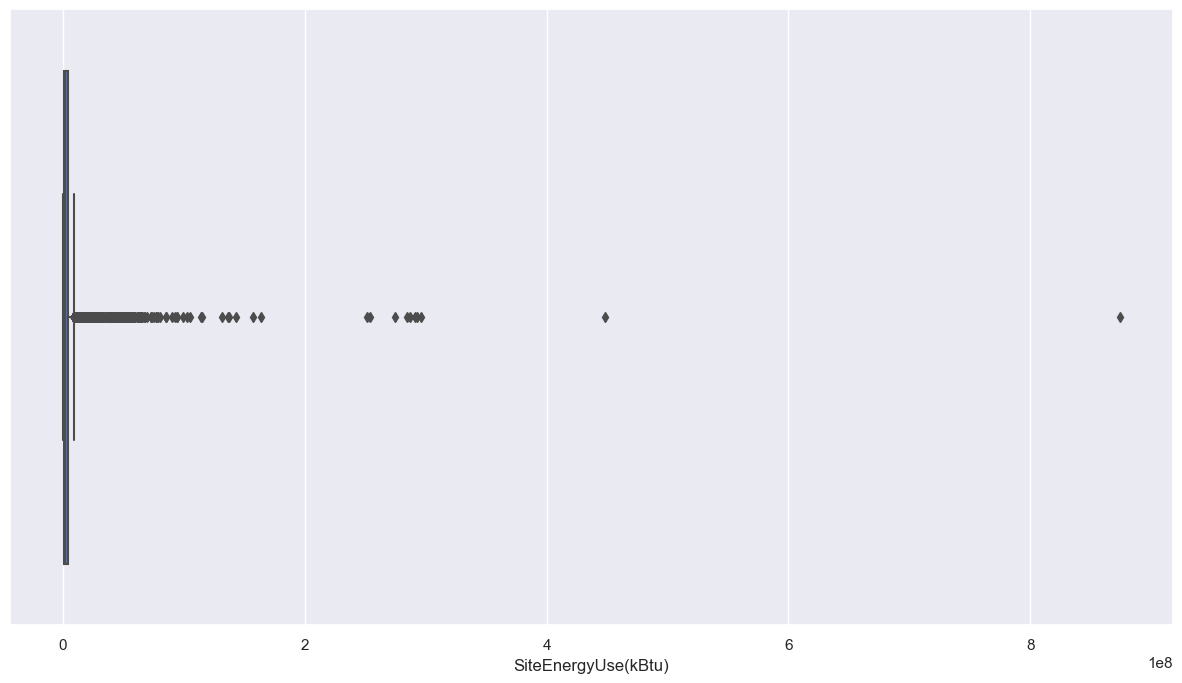

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


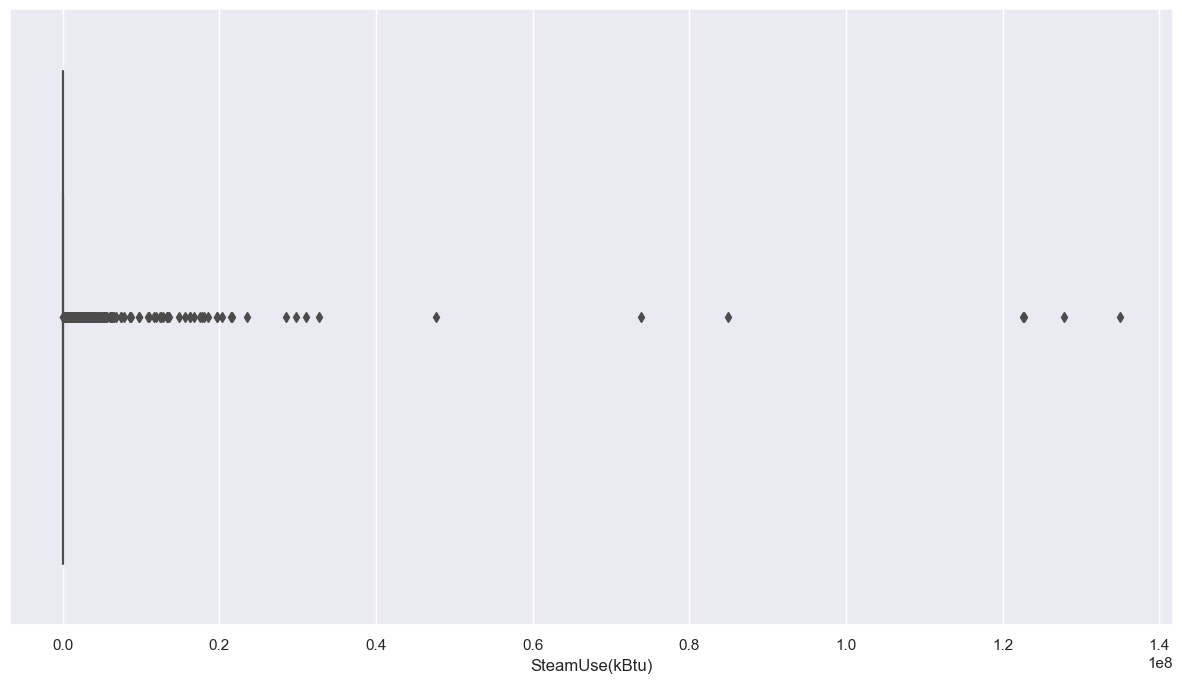

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


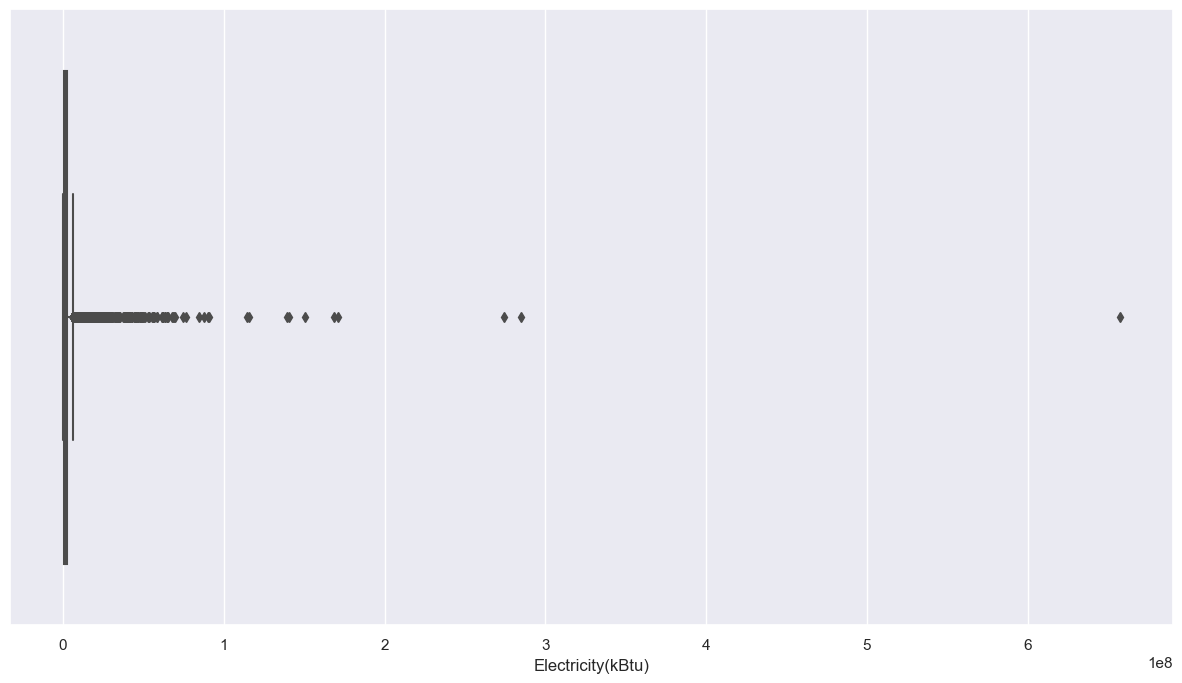

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


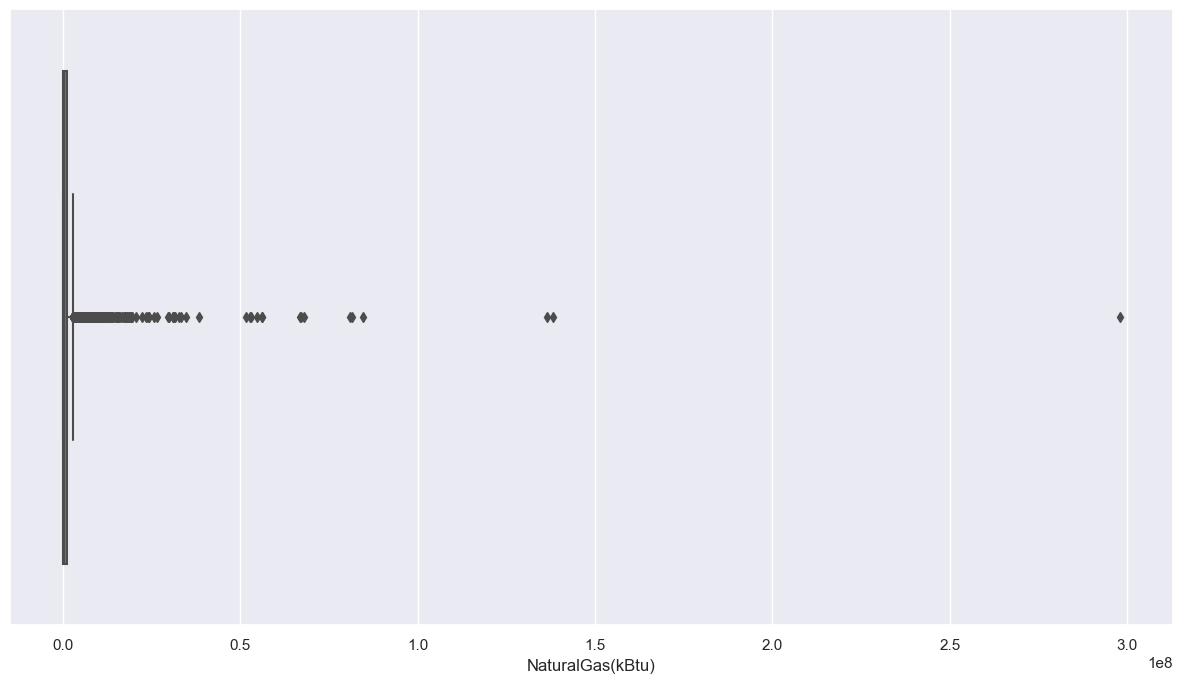

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


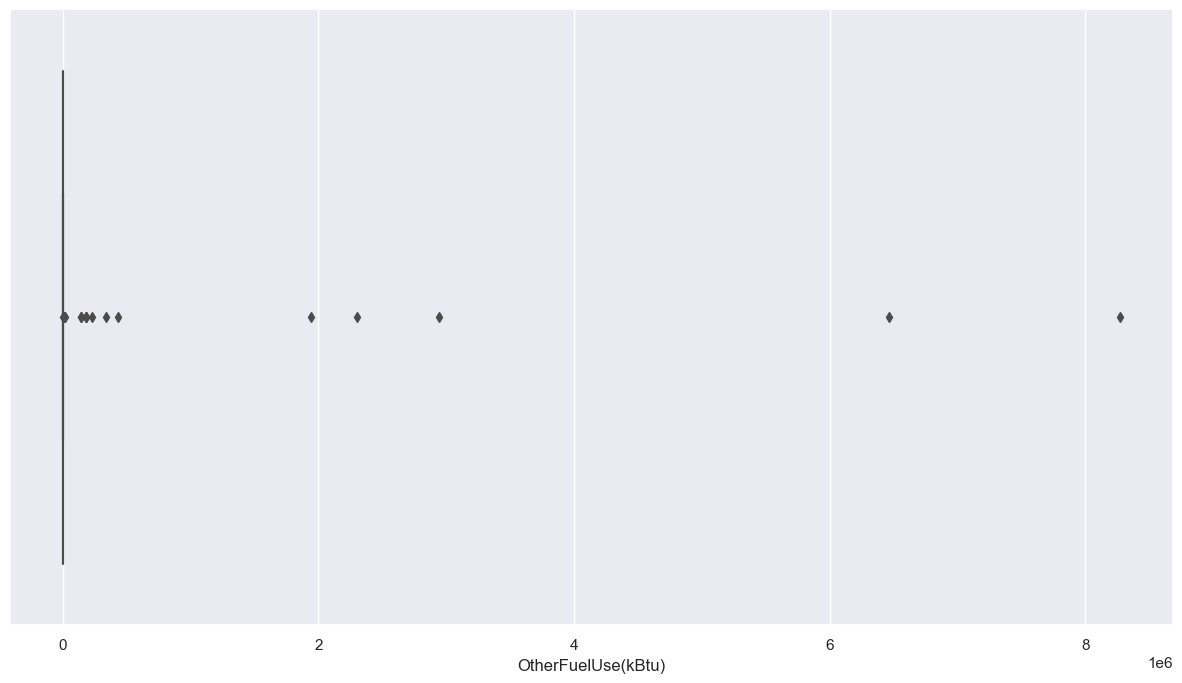

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


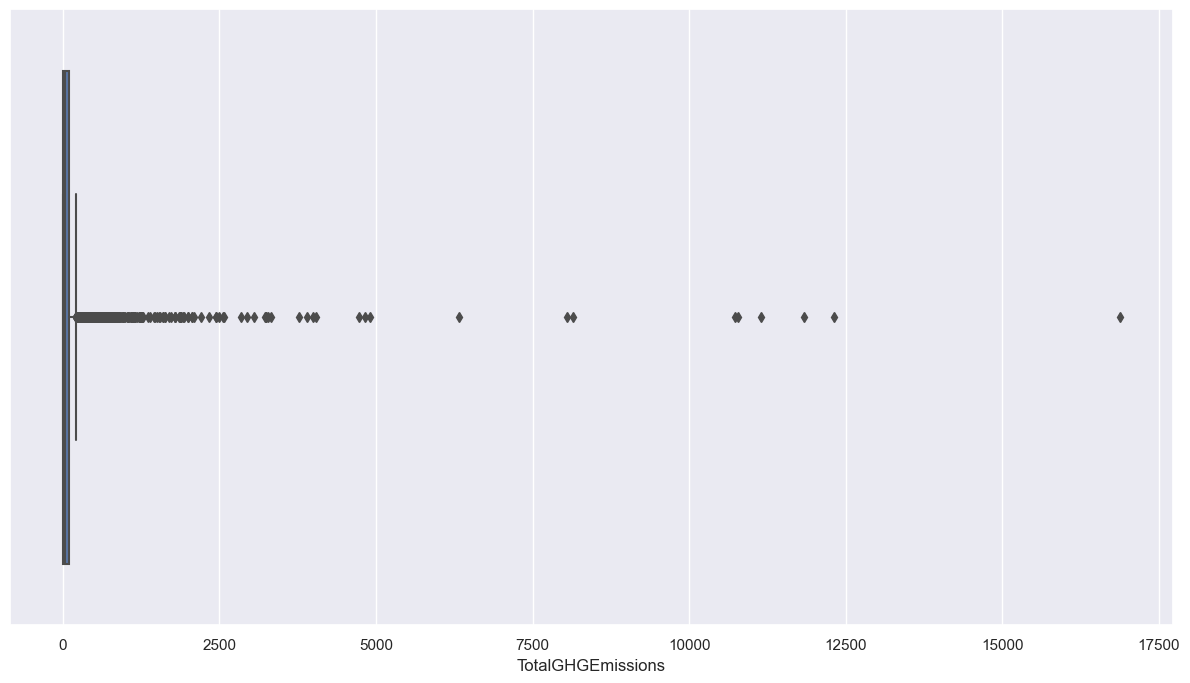

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


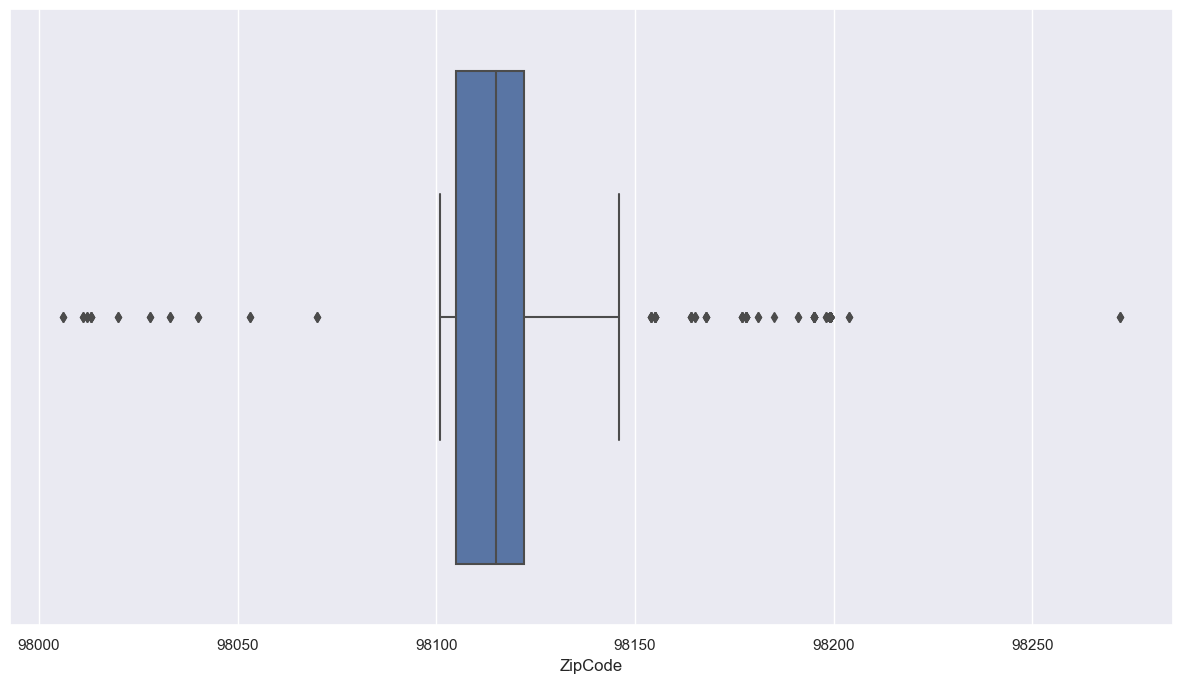

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


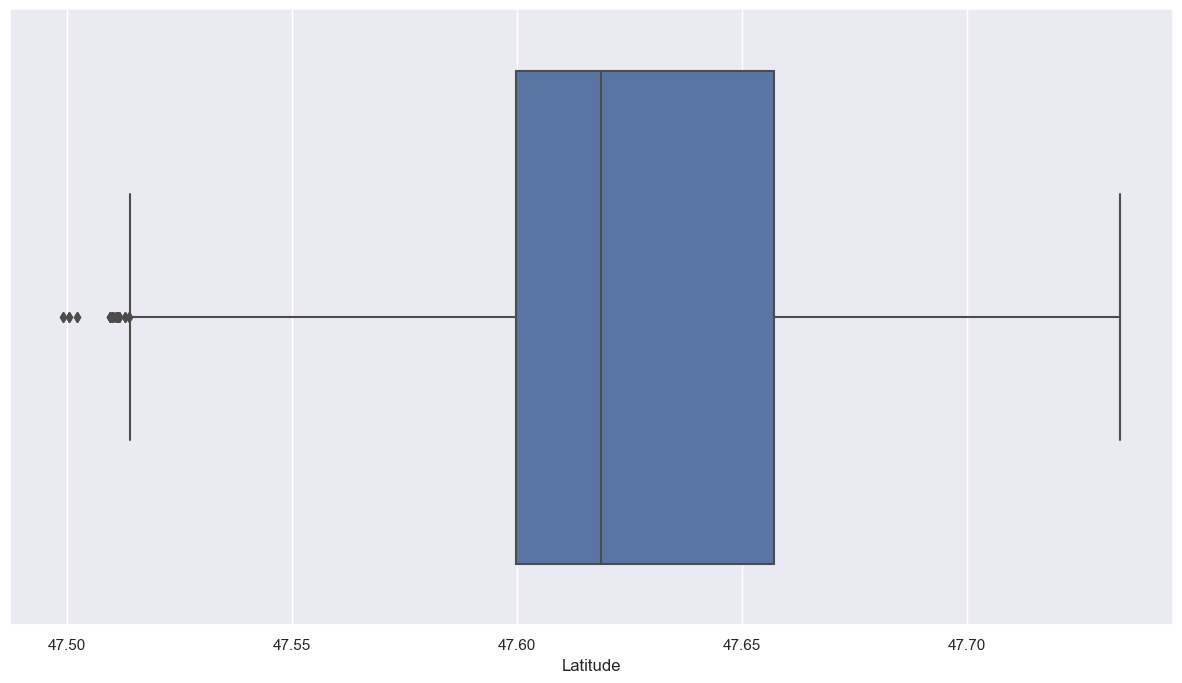

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


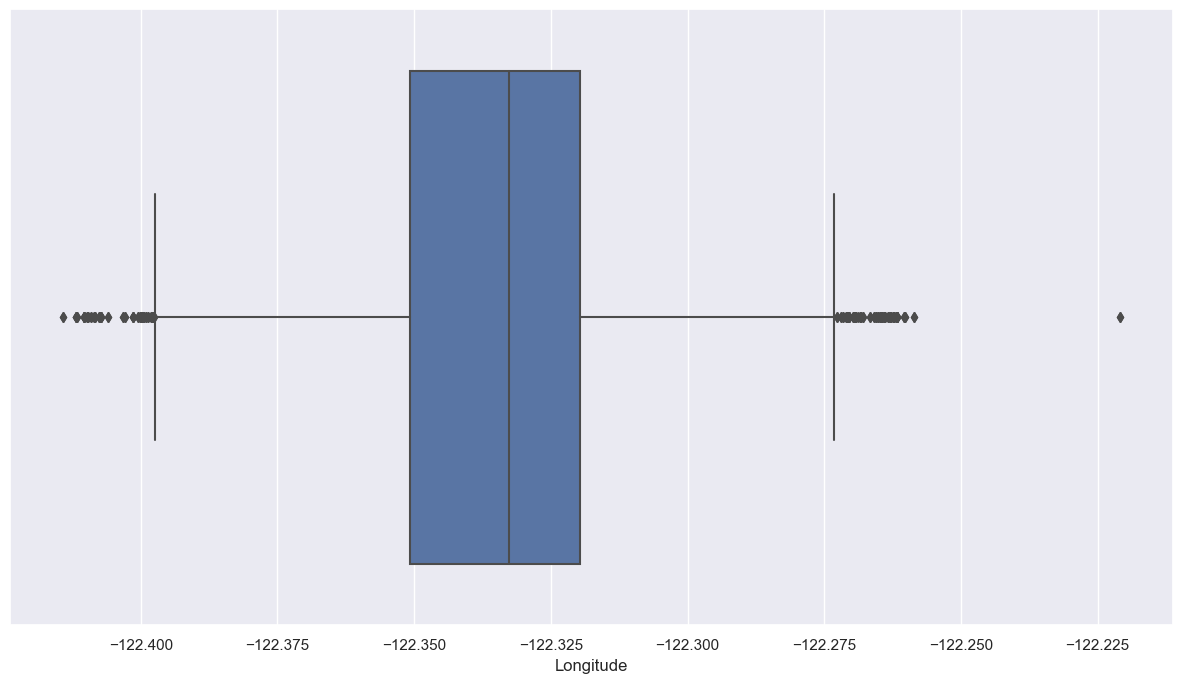

In [33]:
# Boxplot des var quant sans distinction particulière
for col in df_0.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(15,8))
    sns.boxplot(df_0[col])
    plt.show()

In [34]:
#Il y a des propriétés avec 0 consommation en energie, 0 émission, 0 building ou 0 étages

In [35]:
# Propriété avec des erreurs
df_errors = df_0[(df_0[['NumberofBuildings','SiteEnergyUse(kBtu)','Electricity(kBtu)','TotalGHGEmissions']]==0).any(axis=1)]
df_errors.shape

(115, 40)

In [36]:
# Propriété sans batiment
df_errors = df_0[(df_0['NumberofBuildings']==0)]
df_errors.shape

(92, 40)

In [37]:
len(df_errors.OSEBuildingID.unique())

92

In [38]:
df_errors.DataYear.value_counts()
#on a que des données de 2016 à problèmes

2016    92
Name: DataYear, dtype: int64

In [39]:
# il y a autant Id unique que de propriété avec ces errerurs. C'est seulement sur une année que l'anomalie sur le batiment est été repérée. 
# Sur une autre année on pourrait av oir de quoi imputer

In [40]:
df_errors.OSEBuildingID[~df_errors.OSEBuildingID.isin(df_0[df_0['DataYear']==2015]['OSEBuildingID'])]
#Toutes ces propriétés sont aussi présentent en 2015

Series([], Name: OSEBuildingID, dtype: int64)

In [41]:
# Propriétés imputées avec les valeurs de 2015
for i in df_errors.OSEBuildingID:
    df_0.loc[(df_0['OSEBuildingID']==i) & (df_0['DataYear']==2016), 'NumberofBuildings'] = df_0.loc[(df_0['OSEBuildingID']==i) & (df_0['DataYear']==2015), 'NumberofBuildings']

In [42]:
#Vérification
df_errors = df_0[(df_0['NumberofBuildings']==0)]
df_errors.shape

(0, 40)

In [43]:
# Propriété sans consommation
df_errors = df_0[df_0['SiteEnergyUse(kBtu)']==0]
df_errors.shape

(20, 40)

In [44]:
# Propriété sans consommation imputées avec nan
df_0.loc[df_0['SiteEnergyUse(kBtu)']==0, 'SiteEnergyUse(kBtu)'] = np.nan

In [45]:
# Propriété avec des erreurs sur l'électricité ou le total des émissions de CO2
df_errors = df_0[(df_0[['Electricity(kBtu)','TotalGHGEmissions']]==0).any(axis=1)]
df_errors.shape

(16, 40)

In [46]:
df_errors

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State,ZipCode,Latitude,Longitude
261,58,2015,NonResidential,Retail Store,CENTURY SQUARE RETAIL,1975700365,"1525 4TH AVE\nSEATTLE, WA 98101\n(47.61076355,...",7,DOWNTOWN,1920,1.0,2.0,57428,0,57428,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,34617.0,Non-Refrigerated Warehouse,13028.0,Other,9783.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.00,No,NaN,Compliant,NaN,1301 5th Ave,Seattle,WA,98101.0,47.60896,-122.33481
1041,765,2015,NonResidential,Large Office,SEATTLE TOWER,1975200005,"1218 3RD AVE\nSEATTLE, WA 98101\n(47.60765462,...",7,DOWNTOWN,1929,1.0,27.0,216571,13320,203251,"Office, Other - Technology/Science, Parking",Office,182604.0,Parking,13320.0,Other - Technology/Science,6246.0,"2014, 2013, 2012, 2008",NaN,NaN,0.0,0.0,0.0,0.0,0.00,No,NaN,Compliant,NaN,20-24 S. Idaho Street,Seattle,WA,98134.0,47.56489,-122.34090
28,34,2016,SPS-District K-12,K-12 School,Meany Building,0688000090,301/300 21st Ave. E. Seattle WA 0 98101....,3,Central,1955,1.0,1.0,126351,0,126351,K-12 School,K-12 School,126351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.00,False,NaN,Missing Data,NaN,301/300 21st Ave. E.,Seattle,WA,98112.0,47.62266,-122.30547
133,217,2016,SPS-District K-12,K-12 School,Whitman Middle,3526039131,9201 15th Ave. NW. Seattle WA 0 98101.0\...,6,BALLARD,1959,1.0,1.0,160270,0,160270,K-12 School,K-12 School,160270.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4318917.0,NaN,229.38,False,NaN,Missing Data,NaN,9201 15th Ave. NW.,Seattle,WA,98117.0,47.69675,-122.37760
139,227,2016,SPS-District K-12,K-12 School,Washington Middle,3646100540,2101 S. Jackson Seattle WA 0 98101.0\n1 ...,3,CENTRAL,1963,1.0,3.0,136188,0,136188,K-12 School,K-12 School,136188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,3217877.0,NaN,170.90,False,NaN,Missing Data,NaN,2101 S. Jackson,Seattle,WA,98144.0,47.59796,-122.30415
152,242,2016,SPS-District K-12,K-12 School,Olympic View Elementary,5100404840,504 N.E. 95th St. Seattle WA 0 98101.0\n...,5,NORTH,1989,1.0,2.0,52792,0,52792,K-12 School,K-12 School,55480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.00,False,NaN,Missing Data,NaN,504 N.E. 95th St.,Seattle,WA,98115.0,47.69823,-122.32126
304,435,2016,NonResidential,Other,Washington State Convention Center,1978200105,705 Pike St Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1990,1.0,6.0,1400000,0,1400000,"Convention Center, Parking",Convention Center,1072000.0,Parking,686750.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.00,False,NaN,Non-Compliant,NaN,705 Pike St,Seattle,WA,98101.0,47.61195,-122.33167
426,23854,2016,NonResidential,Restaurant,Pier 57,7666202435,1301 Alaskan Way Seattle WA 0 98101.0\n1...,7,DOWNTOWN,1900,1.0,1.0,43728,0,43728,Restaurant,Restaurant,43728.0,NaN,NaN,NaN,NaN,NaN,NaN,11508035.0,0.0,0.0,11508035.0,NaN,611.19,False,NaN,Compliant,NaN,1301 Alaskan Way,Seattle,WA,98101.0,47.60613,-122.34115
513,700,2016,NonResidential,Supermarket / Grocery Store,IUC- Whole Foods Interbay,7666201460,2001 15th Avenue West Seattle WA 0 98101...,7,MAGNOLIA / QUEEN ANNE,2008,1.0,1.0,57176,0,57176,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,39500.0,Retail Store,15000.0,"Personal Services (Health/Beauty, Dry Cleaning...",5500.0,NaN,31.0,12525174.0,0.0,0.0,0.0,NaN,0.00,False,NaN,Compliant,NaN,2001 15th Avenue West,Seattle,WA,98119.0,47.63718,-122.37734
746,19776,2016,NonResidential,Other,Welcome Home Society - PriceCo,016400

In [47]:
df_0[df_0['OSEBuildingID']==23854.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State,ZipCode,Latitude,Longitude
2086,23854,2015,NonResidential,Restaurant\n,PIER 57 BAY PAVILION,7666202435,"1301 ALASKAN WAY\nSEATTLE, WA 98101\n(47.60607...",7,DOWNTOWN,1900,1.0,1.0,43728,0,43728,Restaurant,Restaurant,43728.0,NaN,NaN,NaN,NaN,NaN,NaN,10721568.0,0.0,426512.0,10295074.0,0.0,549.74,No,NaN,Compliant,NaN,9401 Aurora Ave N,Seattle,WA,98103.0,47.69734,-122.34639
426,23854,2016,NonResidential,Restaurant,Pier 57,7666202435,1301 Alaskan Way Seattle WA 0 98101.0\n1...,7,DOWNTOWN,1900,1.0,1.0,43728,0,43728,Restaurant,Restaurant,43728.0,NaN,NaN,NaN,NaN,NaN,NaN,11508035.0,0.0,0.0,11508035.0,NaN,611.19,False,NaN,Compliant,NaN,1301 Alaskan Way,Seattle,WA,98101.0,47.60613,-122.34115


In [48]:
# Ces propriétés avec des erreurs sur l'électricité ou le total des émissions de CO2 seront imputées avec nan
df_0.loc[df_0['Electricity(kBtu)']==0,'Electricity(kBtu)'] = np.nan
df_0.loc[df_0['TotalGHGEmissions']==0,'TotalGHGEmissions'] = np.nan

In [49]:
#Verification
df_errors = df_0[(df_0[['NumberofBuildings','SiteEnergyUse(kBtu)','Electricity(kBtu)','TotalGHGEmissions']]==0).any(axis=1)]
df_errors.shape

(0, 40)

In [50]:
#### Sauvegarde intermediaire

In [51]:
data_2 = df_0.copy()

In [52]:
df_0 = data_2.copy()

In [53]:
#Liste des immeubles sans étages
df_errors = df_0[df_0['NumberofFloors']==0]
df_errors.shape

(21, 40)

In [54]:
df_errors

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Outlier,Address,City,State,ZipCode,Latitude,Longitude
188,656,2015,NonResidential,Medical Office,1221 MADISON STREET (FORMER ARNOLD MED. PAVILLON),8725990000,"1221 MADISON ST\nSEATTLE, WA 98104\n(47.609679...",3,EAST,2004,1.0,0.0,225982,0,225982,Medical Office,Medical Office,200184.0,NaN,NaN,NaN,NaN,NaN,61.0,1.855816e+07,6765824.0,11792829.0,0.0,0.0,604.45,No,NaN,Compliant,NaN,4408 Delridge Way SW,Seattle,WA,98106.0,47.56379,-122.36301
203,267,2015,NonResidential,Hotel,PINE ST. CONDO-ELLIOTT GRAND HYATT SEATTLE,6792120000,"721 PINE ST\nSEATTLE, WA 98101\n(47.61267744, ...",7,DOWNTOWN,1999,1.0,0.0,934292,0,934292,"Hotel, Other, Parking, Restaurant, Retail Store",Hotel,495536.0,Parking,438756.0,Restaurant,49700.0,NaN,NaN,6.381104e+07,0.0,39667989.0,24144689.0,0.0,1558.85,No,NaN,Compliant,NaN,2401 Fourth Avenue,Seattle,WA,98121.0,47.61619,-122.34599
330,657,2015,NonResidential,Mixed Use Property,2200 WESTLAKE,8729740000,"2200 WESTLAKE AVE\nSEATTLE, WA 98121\n(47.6179...",7,DOWNTOWN,2006,1.0,0.0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0,NaN,19.0,4.898105e+07,0.0,29882718.0,19099575.0,0.0,1222.69,No,NaN,Compliant,NaN,201 Queen Anne Ave N,Seattle,WA,98109.0,47.62003,-122.35706
1139,758,2015,NonResidential,Other,PACIFIC PLACE,6600470000,"600 PINE ST\nSEATTLE, WA 98101\n(47.61287405, ...",7,DOWNTOWN,1999,1.0,0.0,947987,440185,507802,"Office, Other - Entertainment/Public Assembly,...",Other - Mall,561684.0,Other - Entertainment/Public Assembly,100000.0,Restaurant,80000.0,NaN,NaN,4.814322e+07,0.0,48145216.0,0.0,0.0,335.63,No,NaN,Compliant,NaN,936 N 34TH ST,Seattle,WA,98103.0,47.64904,-122.34609
1421,23311,2015,NonResidential,Other,FIRST HILL MEDICAL PAVILLION,8590900646,"1124 COLUMBIA ST\nSEATTLE, WA 98104\n(47.60830...",3,EAST,1945,1.0,0.0,274568,0,274568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.524639e+07,13364736.0,11882142.0,0.0,0.0,1114.43,No,NaN,Compliant,NaN,9021 35th Ave SW,Seattle,WA,98126.0,47.52225,-122.37718
166,267,2016,NonResidential,Hotel,Grand Hyatt Seattle,6792120000,721 Pine St Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1999,1.0,0.0,934292,0,934292,"Hotel, Other, Parking, Restaurant, Retail Store",Hotel,495536.0,Parking,438756.0,Restaurant,49700.0,NaN,NaN,6.504728e+07,0.0,39364114.0,25683162.0,NaN,1638.46,False,NaN,Compliant,NaN,721 Pine St,Seattle,WA,98101.0,47.61275,-122.33330
487,656,2016,NonResidential,Medical Office,Arnold Pavilion,8725990000,1221 Madison Street Seattle WA 0 98101.0...,3,EAST,2004,1.0,0.0,225982,0,225982,Medical Office,Medical Office,200184.0,NaN,NaN,NaN,NaN,NaN,53.0,2.056062e+07,7815663.0,12744957.0,0.0,NaN,692.12,False,NaN,Compliant,NaN,1221 Madison Street,Seattle,WA,98104.0,47.60979,-122.32298
488,657,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,8729740000,2200 Westlake Ave. Seattle WA 0 98101.0\...,7,DOWNTOWN,2006,NaN,0.0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0,NaN,31.0,3.940332e+07,0.0,29432803.0,9970512.0,NaN,734.72,False,NaN,Compliant,NaN,2200 Westlake Ave.,Seattle,WA,98121.0,47.61783,-122.33729
564,758,2016,NonResidential,Other,Pacific Place,6600470000,600 Pine Street Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1999,1.0,0.0,947987,0,947987,"Office, Other - Entertainment/Public Assembly,...",Other - Mall

In [55]:
# années des prorpiétés conecernés
df_errors.DataYear.value_counts()
#IL y a des batiments de 2015 que de 2016

2016    16
2015     5
Name: DataYear, dtype: int64

In [56]:
# Toutes ces propriétés sont-elles uniques pour prendre les références de l'autre année?
len(df_errors.OSEBuildingID.unique())
# Non, on a pas autant d'unique ID que de propriétés concernées 

16

In [57]:
# Liste des id présents que une fois et en double
id_u = df_errors.OSEBuildingID.unique()[df_errors.OSEBuildingID.value_counts()==1]
id_double = df_errors.OSEBuildingID.unique()[df_errors.OSEBuildingID.value_counts()==2]

In [58]:
#vérif
len(id_u) , len(id_double)

(11, 5)

In [59]:
# pour les id en double, impute avec nan
df_0.loc[df_0['OSEBuildingID'].isin(id_double),'NumberofFloors'] = np.nan

In [60]:
# verif
df_0.loc[df_0['OSEBuildingID'].isin(id_double),'NumberofFloors']
# j'ai bien 10 imputations car Id en double ( 5 x 2)

188    NaN
203    NaN
330    NaN
1139   NaN
1421   NaN
166    NaN
487    NaN
488    NaN
564    NaN
1754   NaN
Name: NumberofFloors, dtype: float64

In [61]:
# Toutes les id dans id_u sont -ils présents en 2015 et 2016?
id_2015 = df_0.loc[df_0['DataYear']==2015, 'OSEBuildingID']
id_2016 = df_0.loc[df_0['DataYear']==2016, 'OSEBuildingID']

pd.Series(id_u).isin(id_2015)  & pd.Series(id_u).isin(id_2016)
# Il n' y a que 6 présent dans les 2 années 2015 et en 2016

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [62]:
print(pd.Series(id_u).isin(id_2015), '\n')
print(pd.Series(id_u).isin(id_2016))
# 2015 est la série contraignante

0      True
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
dtype: bool 

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
dtype: bool


In [63]:
df_0.loc[df_0['OSEBuildingID'].isin(id_u[pd.Series(id_u).isin(id_2015)])]['NumberofFloors']

2153    NaN
3121    NaN
3156    NaN
3243    NaN
3268    NaN
3330    NaN
1993    0.0
3130    0.0
3131    0.0
3132    0.0
3168    0.0
3273    0.0
Name: NumberofFloors, dtype: float64

In [64]:
#Impuation par les valeurs de l'autre année pour les id présents en 2015 et 2016 
for i in id_u[pd.Series(id_u).isin(id_2015)]:
    an = df_0.loc[(df_0['OSEBuildingID']==i) & (df_0['NumberofFloors']==0)]['DataYear']
    if (an == 2015).all():
        df_0.loc[(df_0['OSEBuildingID']==i) & (df_0['DataYear']==2015),'NumberofFloors'] = df_0.loc[(df_0['OSEBuildingID']==i) & (df_0['DataYear']==2016),'NumberofFloors']
    else:
        df_0.loc[(df_0['OSEBuildingID']==i) & (df_0['DataYear']==2016),'NumberofFloors'] = df_0.loc[(df_0['OSEBuildingID']==i) & (df_0['DataYear']==2015),'NumberofFloors'] 

In [65]:
#Vérif
df_0.loc[df_0['OSEBuildingID'].isin(id_u[pd.Series(id_u).isin(id_2015)])].shape

(12, 40)

In [66]:
#Vérif
df_0.loc[df_0['OSEBuildingID'].isin(id_u[pd.Series(id_u).isin(id_2015)])]['NumberofFloors']

2153   NaN
3121   NaN
3156   NaN
3243   NaN
3268   NaN
3330   NaN
1993   NaN
3130   NaN
3131   NaN
3132   NaN
3168   NaN
3273   NaN
Name: NumberofFloors, dtype: float64

In [67]:
#Impuation par nan des id de 2015 non présent en 2016 
id_u_2015 = id_u[~pd.Series(id_u).isin(id_2015)]
df_0.loc[df_0['OSEBuildingID'].isin(id_u_2015),'NumberofFloors'] = np.nan

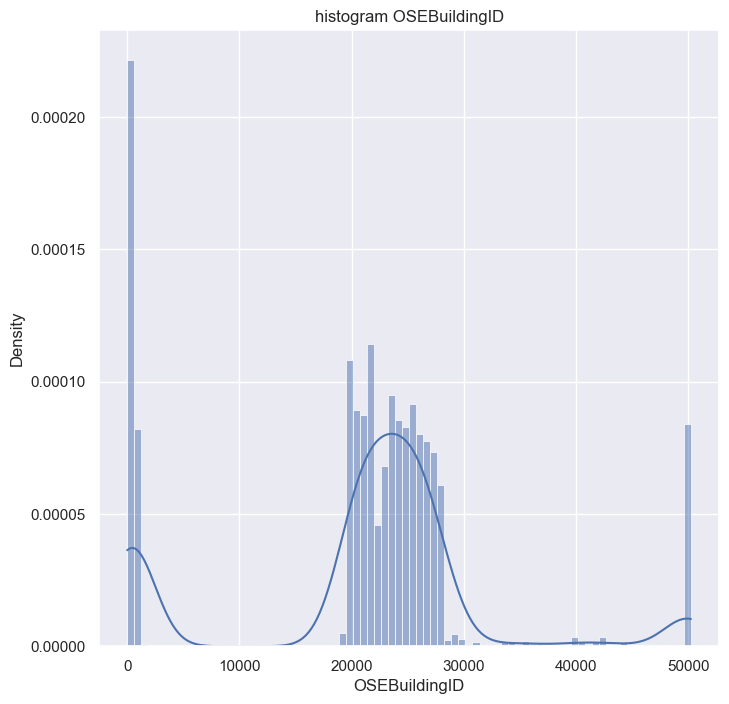

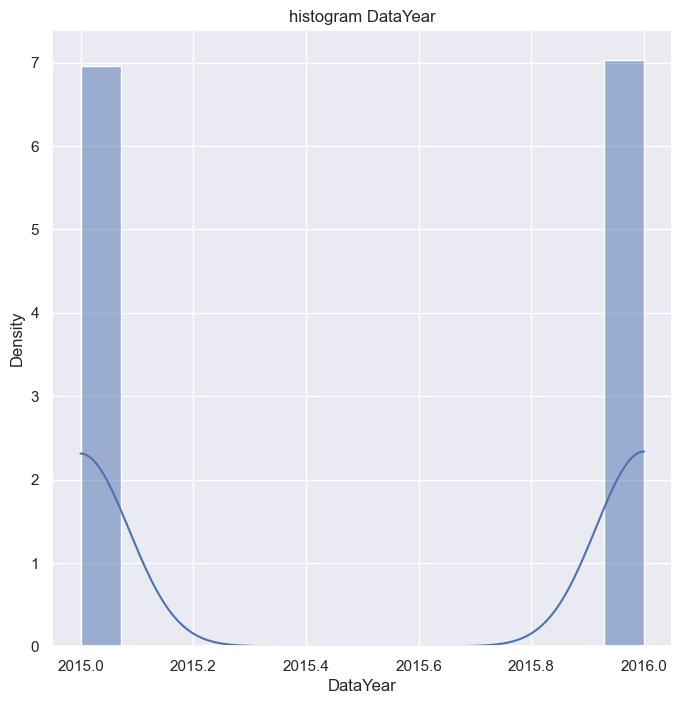

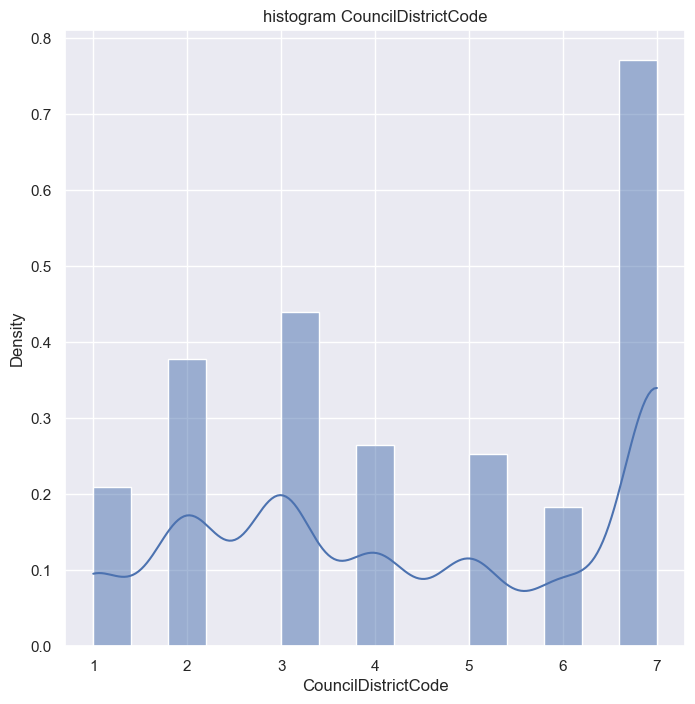

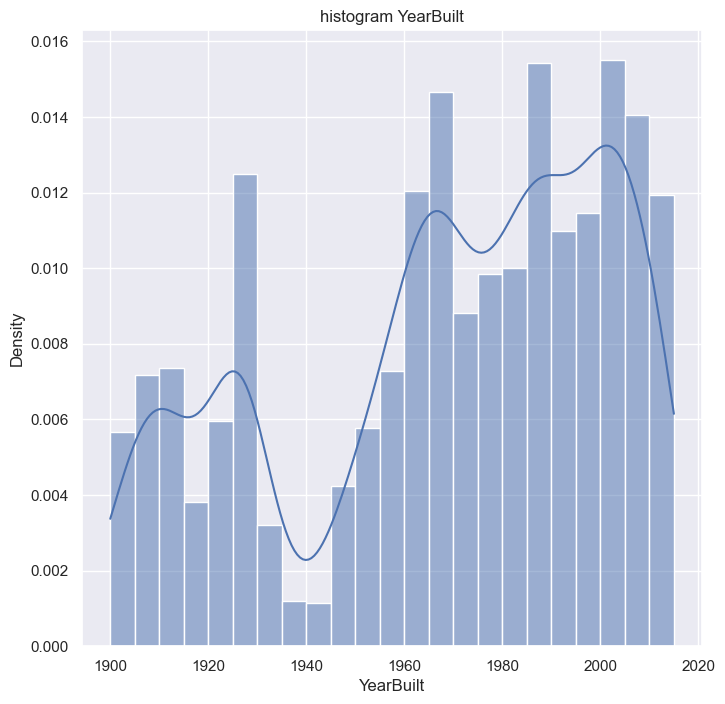

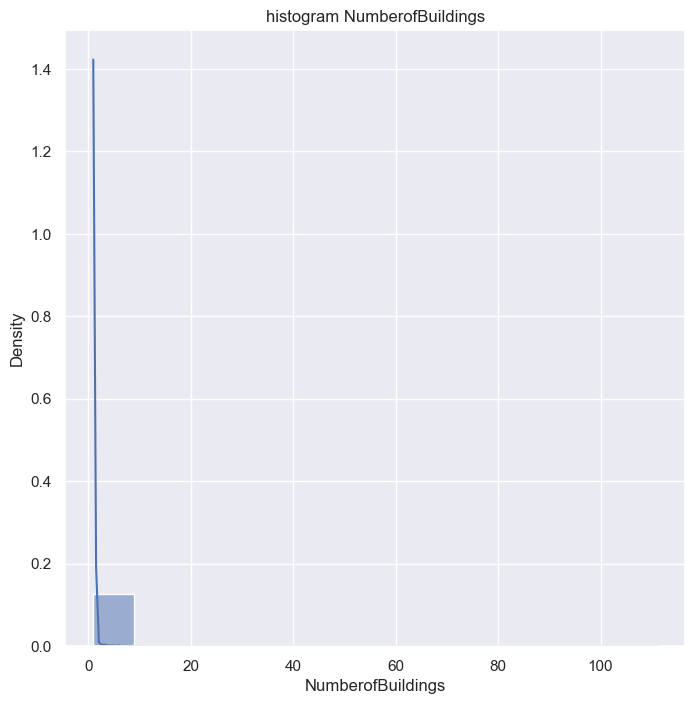

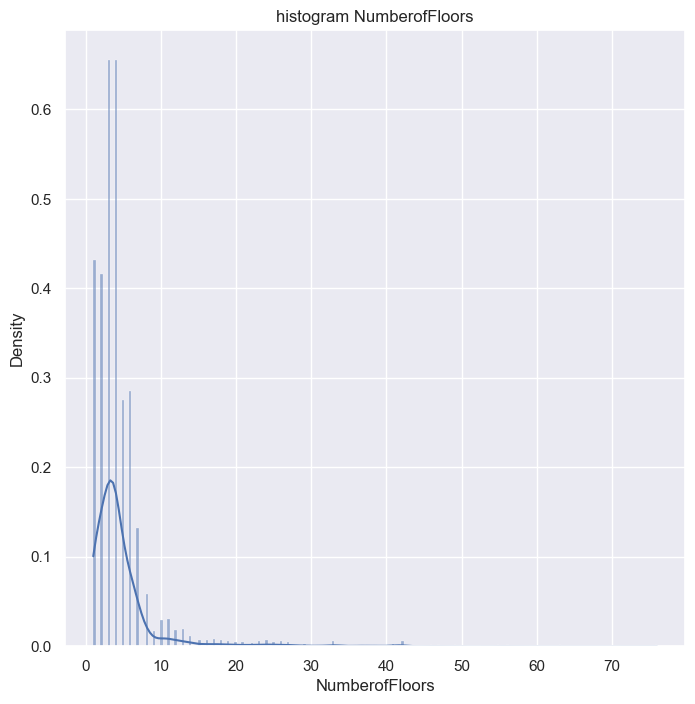

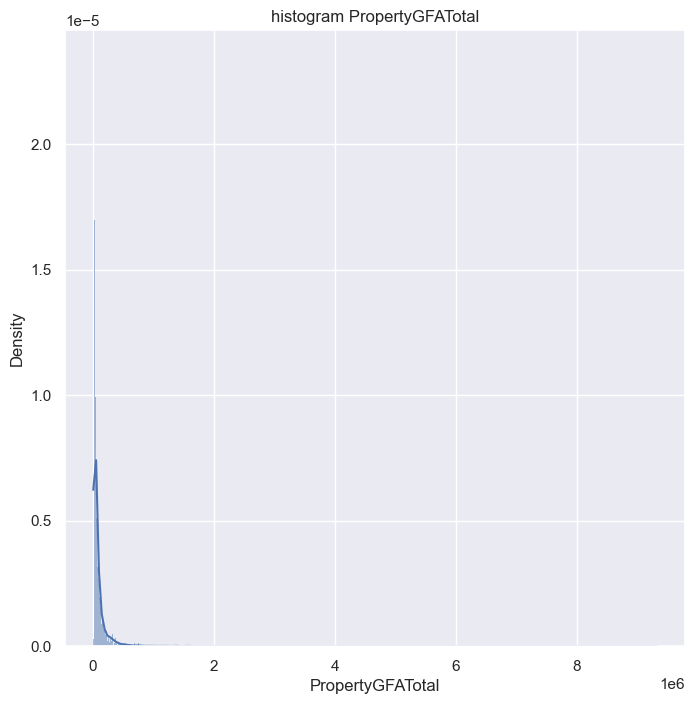

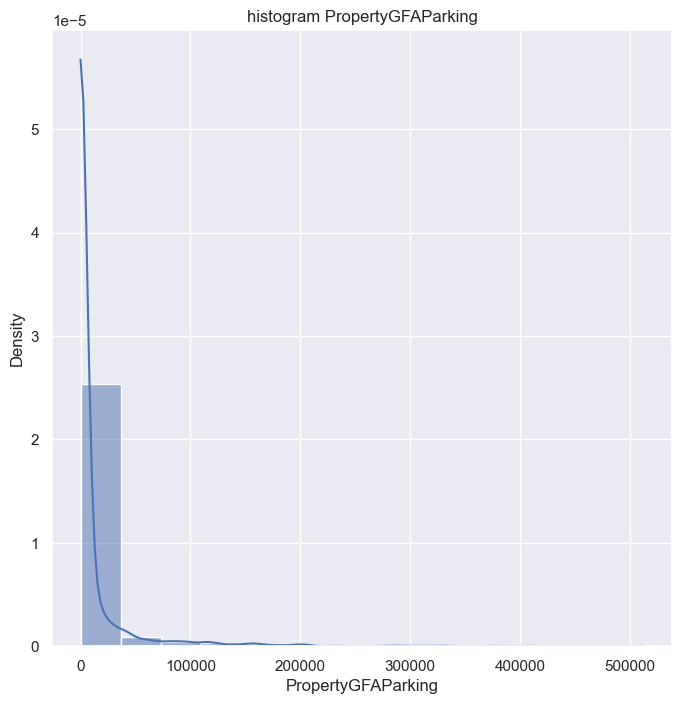

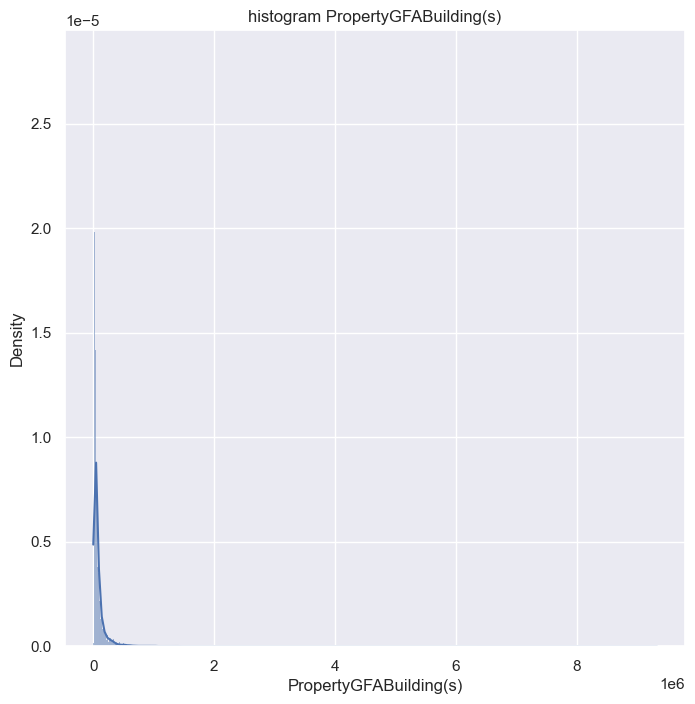

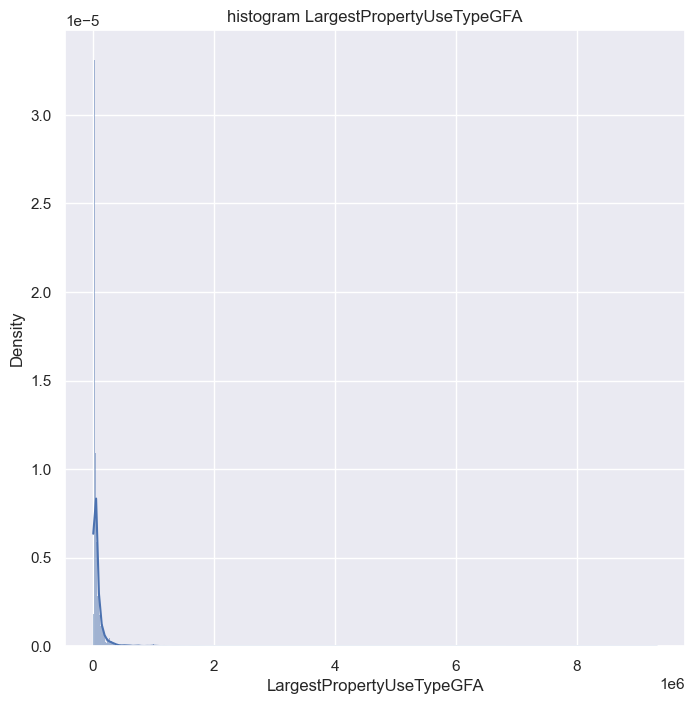

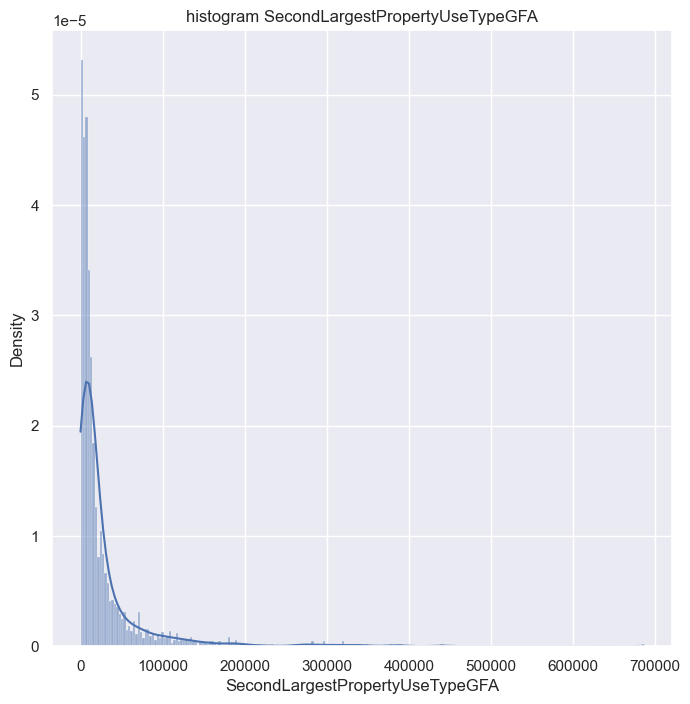

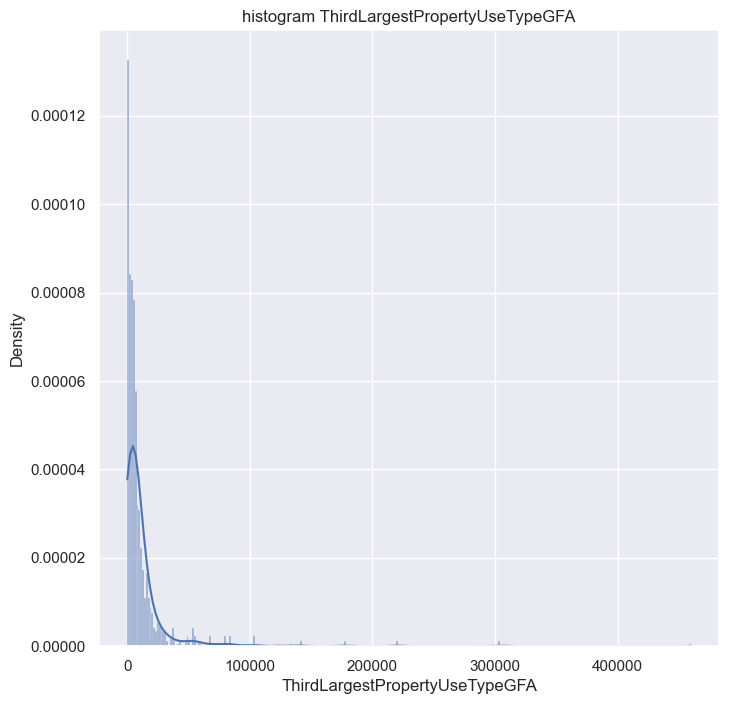

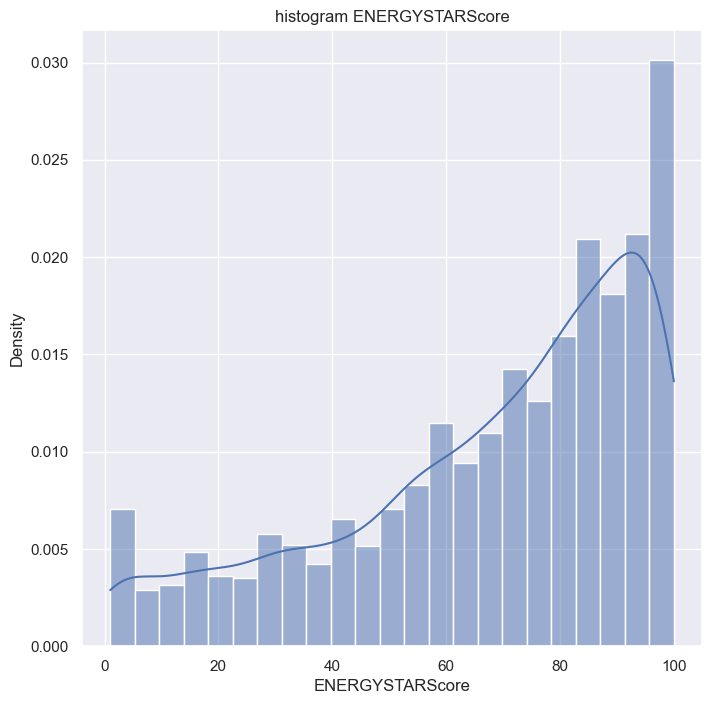

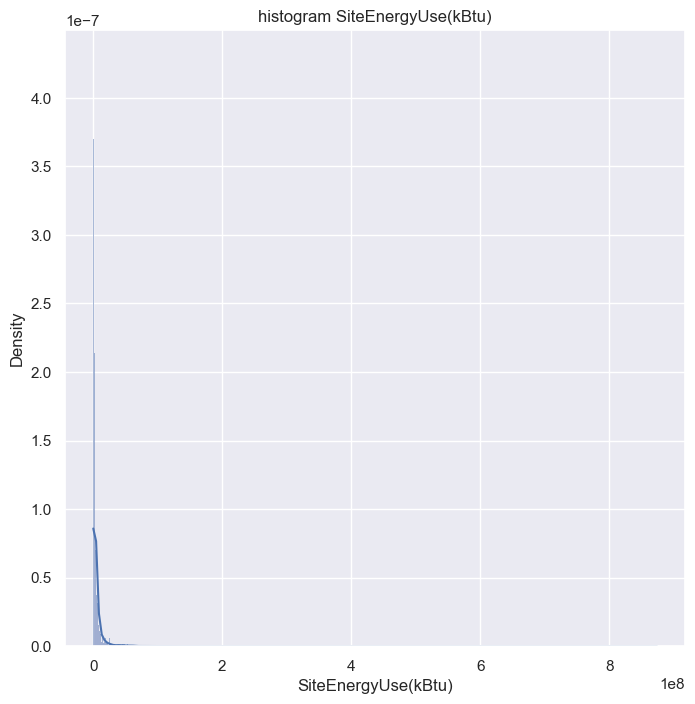

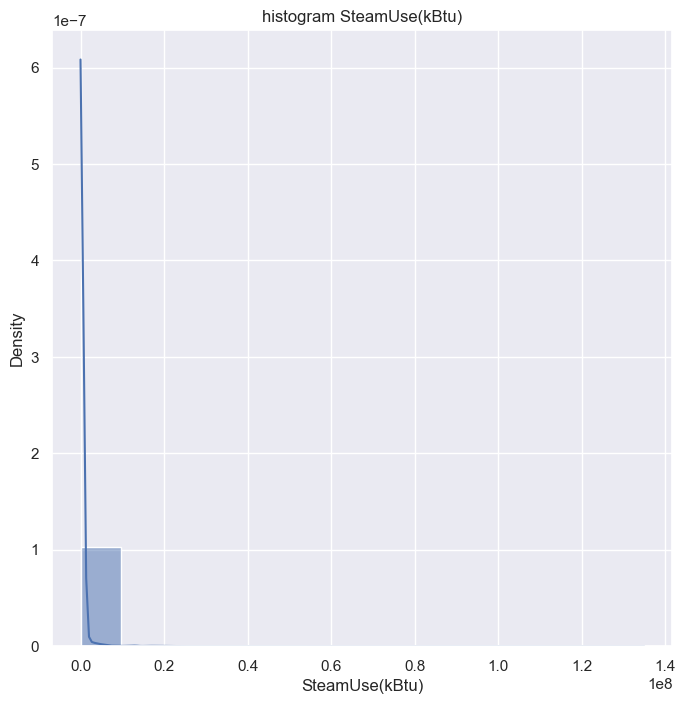

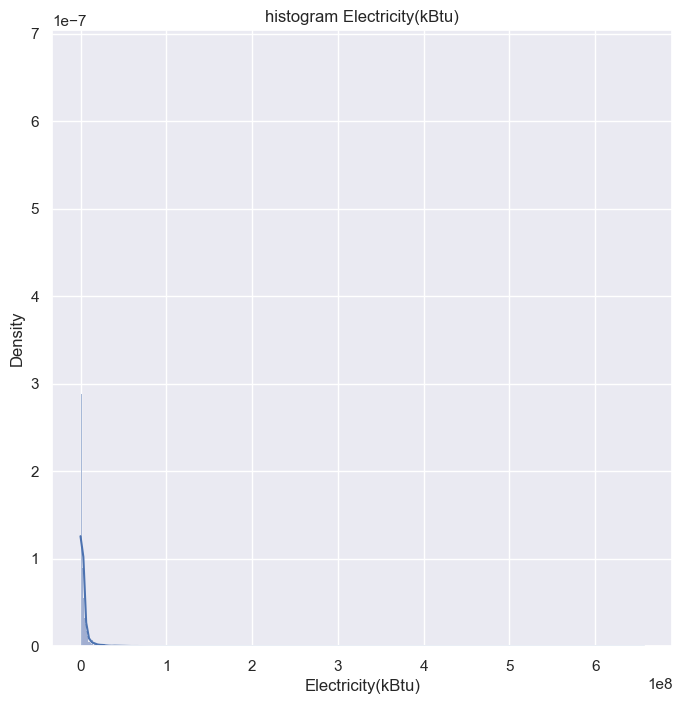

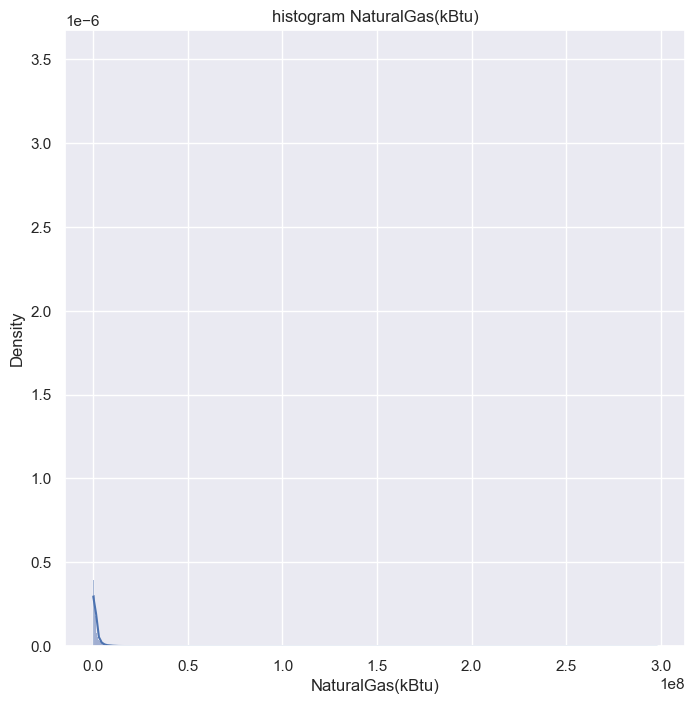

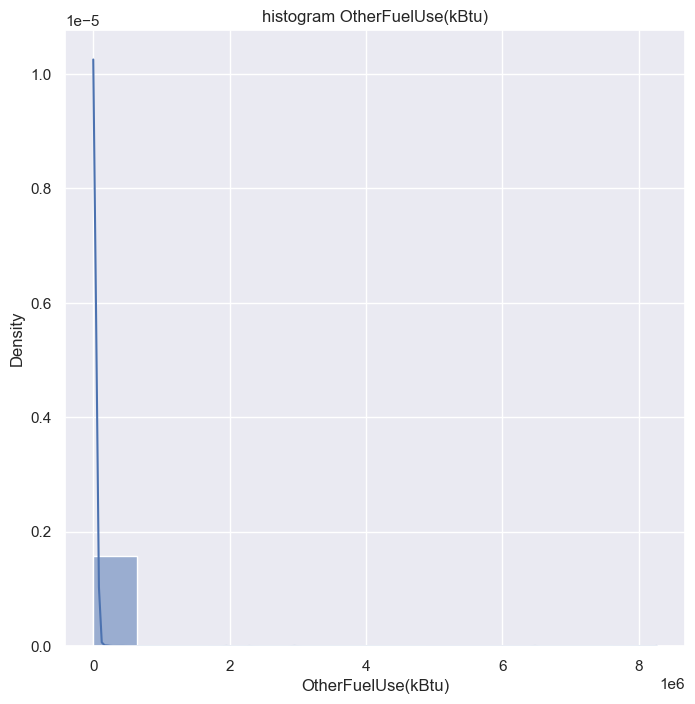

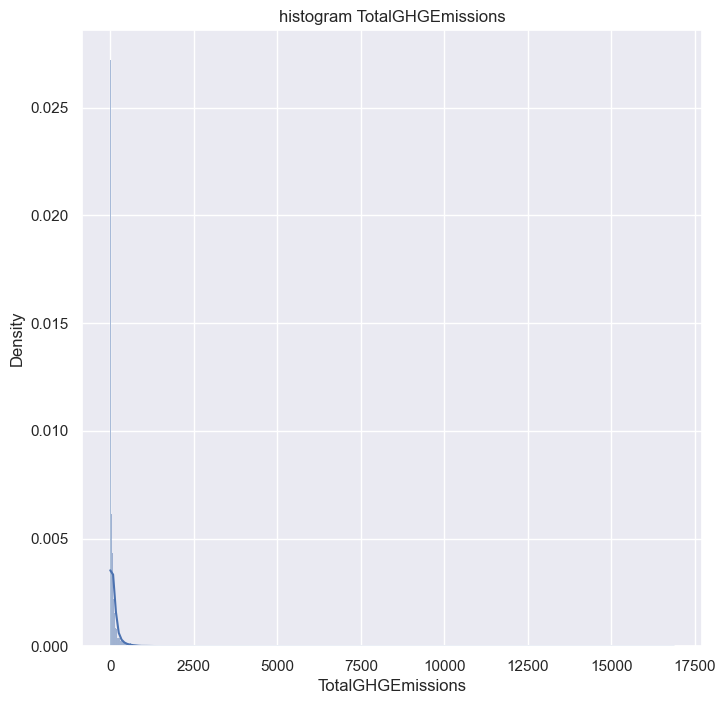

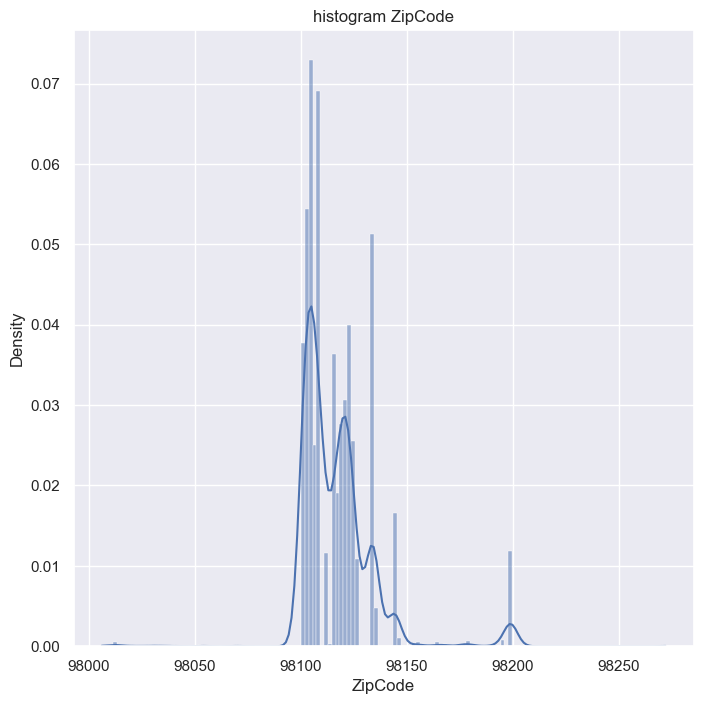

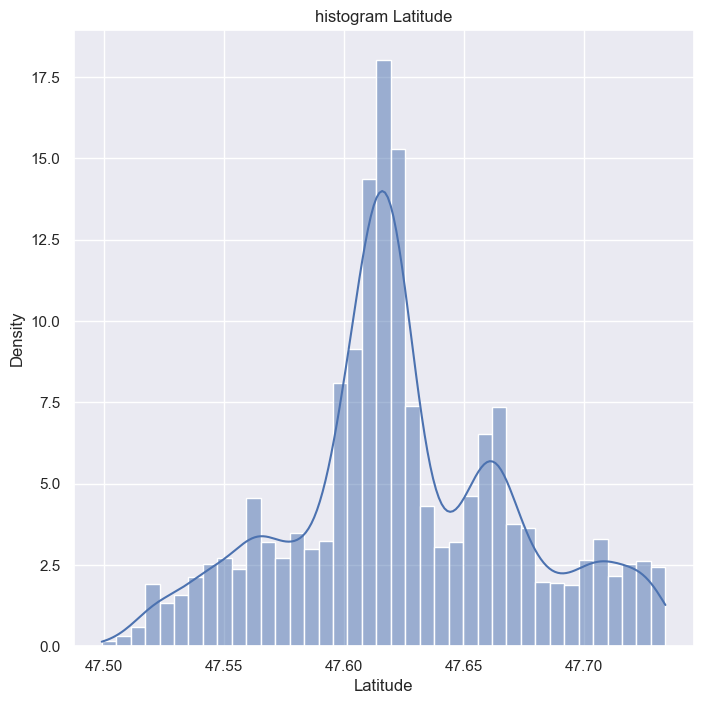

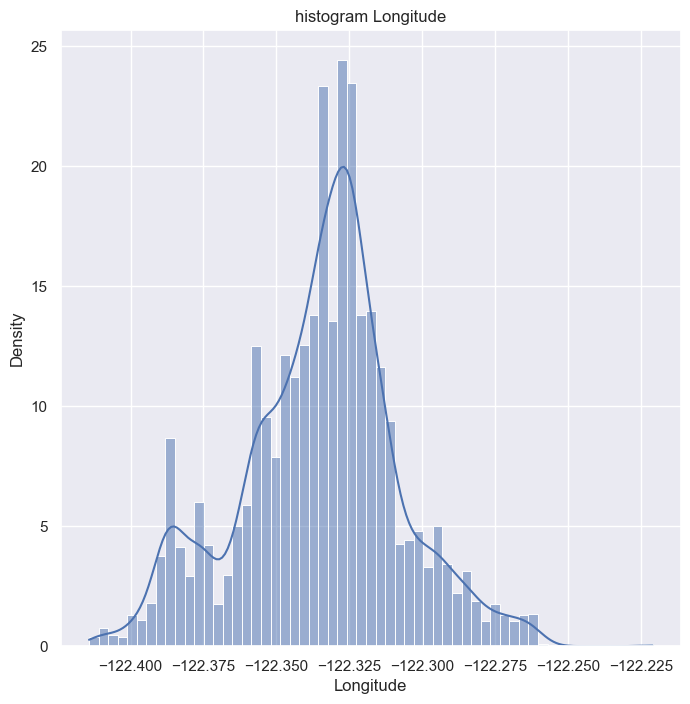

In [68]:
# Tracé des histograms
for col in df_0.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(8,8))
    plt.title('histogram '+col)
    sns.histplot(df_0[col], stat='density', kde=True)
    plt.show()

In [69]:
df_0.select_dtypes(exclude='object').columns

Index(['OSEBuildingID', 'DataYear', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
       'ZipCode', 'Latitude', 'Longitude'],
      dtype='object')

In [70]:
# Créations de groupes de variables
var_id = ['OSEBuildingID', 'DataYear']
var_adress = ['Latitude', 'Longitude']
var_quant = ['YearBuilt','NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal','PropertyGFAParking', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SteamUse(kBtu)', 'Electricity(kBtu)','NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']
var_cat = ['CouncilDistrictCode']
var_target = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

### Analyse des variables catégorielles

In [71]:
for col in df_0.select_dtypes(include='object').columns:
    print('variable  == '+col+ ' :'+str(len( df_0[col].unique()))
    )

variable  == BuildingType :8
variable  == PrimaryPropertyType :32
variable  == PropertyName :6527
variable  == TaxParcelIdentificationNumber :3730
variable  == Location :6652
variable  == Neighborhood :19
variable  == ListOfAllPropertyUseTypes :489
variable  == LargestPropertyUseType :58
variable  == SecondLargestPropertyUseType :51
variable  == ThirdLargestPropertyUseType :46
variable  == YearsENERGYSTARCertified :117
variable  == DefaultData :5
variable  == Comments :14
variable  == ComplianceStatus :5
variable  == Outlier :5
variable  == Address :3355
variable  == City :2
variable  == State :2


In [72]:
df_0.select_dtypes(include='object').columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'Location', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'DefaultData', 'Comments',
       'ComplianceStatus', 'Outlier', 'Address', 'City', 'State'],
      dtype='object')

In [73]:
for col in ['BuildingType', 'PrimaryPropertyType','Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'YearsENERGYSTARCertified', 'DefaultData', 'Comments',
       'ComplianceStatus', 'Outlier', 'City', 'State']:
    print('variable :'+col)
    print(df_0[col].unique(), '\n')

variable :BuildingType
['Multifamily LR (1-4)' 'NonResidential' 'Multifamily HR (10+)'
 'SPS-District K-12' 'Multifamily MR (5-9)' 'Campus' 'Nonresidential COS'
 'Nonresidential WA'] 

variable :PrimaryPropertyType
['Low-Rise Multifamily' 'Hotel' 'High-Rise Multifamily'
 'Supermarket/Grocery Store' 'K-12 School' 'Small- and Mid-Sized Office'
 'Large Office' 'Distribution Center\n' 'Other'
 'Non-Refrigerated Warehouse' 'Hospital' 'Mixed Use Property'
 'Self-Storage Facility\n' 'Retail Store' 'Senior Care Community'
 'Medical Office' 'Residence Hall/Dormitory' 'Mid-Rise Multifamily'
 'College/University' 'Refrigerated Warehouse' 'Distribution Center'
 'Worship Facility' 'Laboratory' 'Self-Storage Facility'
 'SPS-District K-12' 'Restaurant\n' 'Restaurant' 'University' 'Warehouse'
 'Residence Hall' 'Supermarket / Grocery Store' 'Office'] 

variable :Neighborhood
['MAGNOLIA / QUEEN ANNE' 'GREATER DUWAMISH' 'DOWNTOWN' 'LAKE UNION'
 'DELRIDGE' 'BALLARD' 'SOUTHEAST' 'NORTHWEST' 'CENTRAL' 'EAST

### Notes :
    - Neighborhood : mettre tout en capitalize et trimer les espaces gauche droite
    - ListOfAllPropertyUseTypes : Mettre tout en capitalize et trimer les espaces, c'est la mlliste de tous les usages de la propriété
    - YearsENERGYSTARCertified : Listes des années ou il ya eu certifcation ENERGYSTAR / avoir la récence et intervalle moyen entre 2 certifications
        NB : il y a une différence de frappe, certaines listes sont du type 201720182019 sans espace, il faut traiter
    - DefaultData : ['No' 'Yes' nan False True] tout sera mis au foramt 0 (no, fasle) 1 (yes, true)
    - ComplianceStatus ['Not Compliant' 'Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']  mettre Not Compliant en Non-compliant
    - Outlier [nan 'High Outlier' 'Low Outlier' 'High outlier' 'Low outlier'] sera supprimée car étant une variable dérivée

In [74]:
df_0.drop('Outlier', axis=1, inplace=True)

In [75]:
#Mise à jour des catégorie des variables
var_id.extend(['PropertyName','TaxParcelIdentificationNumber'])
var_cat.extend(['BuildingType', 'PrimaryPropertyType','Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType',
                'ThirdLargestPropertyUseType','DefaultData','ComplianceStatus',])
var_obj =['ListOfAllPropertyUseTypes']

In [76]:
var_id


['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber']

In [77]:
# Traitement des variables cat : strip + capitalize + harmonisation des libéllés
for col in var_cat:
    df_0[col] = df_0[col].apply(lambda x : str(x).strip().upper())

In [78]:
for col in var_cat:
    print('variable :'+col)
    print(df_0[col].unique(), '\n')

variable :CouncilDistrictCode
['7' '2' '3' '1' '6' '5' '4'] 

variable :BuildingType
['MULTIFAMILY LR (1-4)' 'NONRESIDENTIAL' 'MULTIFAMILY HR (10+)'
 'SPS-DISTRICT K-12' 'MULTIFAMILY MR (5-9)' 'CAMPUS' 'NONRESIDENTIAL COS'
 'NONRESIDENTIAL WA'] 

variable :PrimaryPropertyType
['LOW-RISE MULTIFAMILY' 'HOTEL' 'HIGH-RISE MULTIFAMILY'
 'SUPERMARKET/GROCERY STORE' 'K-12 SCHOOL' 'SMALL- AND MID-SIZED OFFICE'
 'LARGE OFFICE' 'DISTRIBUTION CENTER' 'OTHER' 'NON-REFRIGERATED WAREHOUSE'
 'HOSPITAL' 'MIXED USE PROPERTY' 'SELF-STORAGE FACILITY' 'RETAIL STORE'
 'SENIOR CARE COMMUNITY' 'MEDICAL OFFICE' 'RESIDENCE HALL/DORMITORY'
 'MID-RISE MULTIFAMILY' 'COLLEGE/UNIVERSITY' 'REFRIGERATED WAREHOUSE'
 'WORSHIP FACILITY' 'LABORATORY' 'SPS-DISTRICT K-12' 'RESTAURANT'
 'UNIVERSITY' 'WAREHOUSE' 'RESIDENCE HALL' 'SUPERMARKET / GROCERY STORE'
 'OFFICE'] 

variable :Neighborhood
['MAGNOLIA / QUEEN ANNE' 'GREATER DUWAMISH' 'DOWNTOWN' 'LAKE UNION'
 'DELRIDGE' 'BALLARD' 'SOUTHEAST' 'NORTHWEST' 'CENTRAL' 'EAST' 'N

In [79]:
#Sauvegarde intermédiaire: données après mise en majuscules des modalités des variables cat / object
data_3 = df_0.copy()

In [80]:
df_0 = data_3.copy()

In [81]:
#Harmonisation des modalités de 'DefaultData' et de 'ComplianceStatus'
df_0.loc[:,'DefaultData']=df_0['DefaultData'].map({'FALSE':'0','NO':'0','TRUE':'1','YES':'1'})
df_0.loc[:,'ComplianceStatus']=df_0['ComplianceStatus'].replace('NOT COMPLIANT', 'NON-COMPLIANT')

In [82]:
#vérification
print(df_0['DefaultData'].unique())
print(df_0['ComplianceStatus'].unique())

['0' '1' nan]
['NON-COMPLIANT' 'COMPLIANT' 'ERROR - CORRECT DEFAULT DATA' 'MISSING DATA']


In [83]:
df_0.shape

(6716, 39)

### Utilisation de la valeur moyenne des variables quantitatives pour chacune des propriétés présentes en 2015 et en 2016

In [84]:
#Suppression des variables dérivées de la consommation et des émissions
var_quant = var_quant[:-4]

In [85]:
var_quant

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

In [86]:
#liste des id en double
id_double = df_0['OSEBuildingID'].unique()[df_0['OSEBuildingID'].value_counts()>1]
len(id_double)

3284

#### Pour les id en double imputation des var features selon la séquence:
    1 - de 2015 avec les valeurs de 2016
    2 - de 2016 avec les valeurs de 2015

In [87]:
for id in id_double:
    df_0.loc[df_0['OSEBuildingID']==id,var_target+var_quant+var_cat] = df_0.loc[df_0['OSEBuildingID']==id,var_target+var_quant+var_cat].fillna(axis=0, method='backfill')
    df_0.loc[df_0['OSEBuildingID']==id,var_target+var_quant+var_cat] = df_0.loc[df_0['OSEBuildingID']==id,var_target+var_quant+var_cat].fillna(axis=0, method='ffill')

In [90]:
### Conservation des valeurs uniques et des moyennes pour id en doubles
df_0_prime = pd.DataFrame(pd.pivot_table(df_0[['OSEBuildingID']+var_target+var_quant[1:]],index='OSEBuildingID',aggfunc='mean'))

In [91]:
df_0_prime = df_0_prime.sort_index()
df_0_prime

,LargestPropertyUseTypeGFA,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),ThirdLargestPropertyUseTypeGFA,TotalGHGEmissions
OSEBuildingID,,,,,,,,,,
1,88434.0,1.0,12.0,88434.0,0.0,88434.0,NaN,7.103895e+06,NaN,249.705
2,83880.0,1.0,11.0,88502.0,15064.0,103566.0,15064.0,8.371084e+06,4622.0,279.685
3,756868.0,1.0,41.0,860691.0,98359.0,959050.0,100000.0,7.285884e+07,0.0,2075.380
5,61320.0,1.0,10.0,61320.0,0.0,61320.0,NaN,1.751195e+07,NaN,1111.385
8,123445.0,1.0,18.0,110505.0,37230.0,147735.0,68009.0,1.450085e+07,0.0,506.355
...,...,...,...,...,...,...,...,...,...,...
50222,12294.0,1.0,1.0,12294.0,0.0,12294.0,NaN,8.497457e+05,NaN,20.940
50223,16000.0,1.0,1.0,16000.0,0.0,16000.0,NaN,9.502762e+05,NaN,32.170
50224,7583.0,1.0,1.0,13157.0,0.0,13157.0,5574.0,5.765898e+06,0.0,223.540


In [92]:
## drop_duplicates sur 'OSEBuildingID' en convervant le last (2016)
df_0 = df_0.drop_duplicates('OSEBuildingID', keep='last')
df_0 = df_0.set_index('OSEBuildingID')
df_0 = df_0.sort_index()
df_0

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016,NONRESIDENTIAL,HOTEL,Mayflower park hotel,0659000030,405 Olive way Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,HOTEL,88434.0,NAN,NaN,NAN,NaN,NaN,60.0,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,NaN,249.98,0,NaN,COMPLIANT,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799
2,2016,NONRESIDENTIAL,HOTEL,Paramount Hotel,0659000220,724 Pine street Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",HOTEL,83880.0,PARKING,15064.0,RESTAURANT,4622.0,NaN,61.0,8.387933e+06,0.00,3.242851e+06,5.145082e+06,NaN,295.86,0,NaN,COMPLIANT,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393
3,2016,NONRESIDENTIAL,HOTEL,5673-The Westin Seattle,0659000475,1900 5th Avenue Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1969,1.0,41.0,956110,196718,759392,Hotel,HOTEL,756493.0,NAN,100000.0,NAN,0.0,NaN,43.0,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,NaN,2089.28,0,NaN,COMPLIANT,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810
5,2016,NONRESIDENTIAL,HOTEL,HOTEL MAX,0659000640,620 STEWART ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,HOTEL,61320.0,NAN,NaN,NAN,NaN,NaN,56.0,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,NaN,286.43,0,NaN,COMPLIANT,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664
8,2016,NONRESIDENTIAL,HOTEL,WARWICK SEATTLE HOTEL (ID8),0659000970,401 LENORA ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",HOTEL,123445.0,PARKING,68009.0,SWIMMING POOL,0.0,NaN,75.0,1.417261e+07,0.00,5.368607e+06,8.803998e+06,NaN,505.01,0,NaN,COMPLIANT,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,NONRESIDENTIAL COS,OFFICE,Horticulture building,1624049080,1600 S Dakota St Seattle WA 0 98101.0\n1...,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,OFFICE,12294.0,NAN,NaN,NAN,NaN,NaN,46.0,8.497457e+05,0.00,5.242709e+05,3.254750e+05,NaN,20.94,1,NaN,ERROR - CORRECT DEFAULT DATA,1600 S Dakota St,Seattle,WA,NaN,47.56722,-122.31154
50223,2016,NONRESIDENTIAL COS,OTHER,International district/Chinatown CC,3558300000,719 8th Ave S Seattle WA 0 98101.0\n1 ...,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,OTHER - RECREATION,16000.0,NAN,NaN,NAN,NaN,NaN,NaN,9.502762e+05,0.00,3.965461e+05,5.537300e+05,NaN,32.17,0,NaN,COMPLIANT,719 8th Ave S,Seattle,WA,NaN,47.59625,-122.32283
50224,2016,NONRESIDENTIAL COS,OTHER,Queen Anne Pool,1794501150,1920 1st Ave W Seattle WA 0 98101.0\n1 ...,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",OTHER - RECREATION,7583.0,FITNESS CENTER/HEALTH CLUB/GYM,5574.0,SWIMMING POOL,0.0,NaN,NaN,5.765898e+06,0.00,1.792159e+06,3.973739e+06,NaN,223.54,0,NaN,COMPLIANT,1920 1st Ave W,Seattle,WA,NaN,47.63644,-122.35784


In [93]:
#Remplacement des var_quant avec la moyenne
df_0.loc[:,var_target+var_quant[1:]] = df_0_prime

In [94]:
df_0 = df_0.reset_index()

In [95]:
df_0.head(200)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,DefaultData,Comments,ComplianceStatus,Address,City,State,ZipCode,Latitude,Longitude
0,1,2016,NONRESIDENTIAL,HOTEL,Mayflower park hotel,0659000030,405 Olive way Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1927,1.0,12.0,88434.0,0.0,88434.0,Hotel,HOTEL,88434.0,NAN,NaN,NAN,NaN,NaN,60.0,7103895.25,2003882.00,3946027.0,1276453.0,NaN,249.705,0,NaN,COMPLIANT,405 Olive way,Seattle,WA,98101.0,47.61220,-122.33799
1,2,2016,NONRESIDENTIAL,HOTEL,Paramount Hotel,0659000220,724 Pine street Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1996,1.0,11.0,103566.0,15064.0,88502.0,"Hotel, Parking, Restaurant",HOTEL,83880.0,PARKING,15064.0,RESTAURANT,4622.000000,NaN,61.0,8371084.00,0.00,3242851.0,5145082.0,NaN,279.685,0,NaN,COMPLIANT,724 Pine street,Seattle,WA,98101.0,47.61317,-122.33393
2,3,2016,NONRESIDENTIAL,HOTEL,5673-The Westin Seattle,0659000475,1900 5th Avenue Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1969,1.0,41.0,959050.0,98359.0,860691.0,Hotel,HOTEL,756868.0,NAN,100000.0,NAN,0.000000,NaN,43.0,72858840.00,21566554.00,49526664.0,1493800.0,NaN,2075.380,0,NaN,COMPLIANT,1900 5th Avenue,Seattle,WA,98101.0,47.61393,-122.33810
3,5,2016,NONRESIDENTIAL,HOTEL,HOTEL MAX,0659000640,620 STEWART ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1926,1.0,10.0,61320.0,0.0,61320.0,Hotel,HOTEL,61320.0,NAN,NaN,NAN,NaN,NaN,56.0,17511952.00,2214446.25,2768924.0,1811213.0,NaN,1111.385,0,NaN,COMPLIANT,620 STEWART ST,Seattle,WA,98101.0,47.61412,-122.33664
4,8,2016,NONRESIDENTIAL,HOTEL,WARWICK SEATTLE HOTEL (ID8),0659000970,401 LENORA ST Seattle WA 0 98101.0\n1 ...,7,DOWNTOWN,1980,1.0,18.0,147735.0,37230.0,110505.0,"Hotel, Parking, Swimming Pool",HOTEL,123445.0,PARKING,68009.0,SWIMMING POOL,0.000000,NaN,75.0,14500852.50,0.00,5368607.0,8803998.0,NaN,506.355,0,NaN,COMPLIANT,401 LENORA ST,Seattle,WA,98121.0,47.61375,-122.34047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,314,2016,NONRESIDENTIAL,HOTEL,Edgewater Seattle,7666202317,2411 Alaskan Way Seattle WA 0 98101.0\n1...,7,DOWNTOWN,1961,1.0,4.0,122309.0,0.0,122309.0,Hotel,HOTEL,122309.0,NAN,NaN,NAN,NaN,NaN,8.0,24757011.00,0.00,6322533.0,19131155.0,NaN,1018.930,0,NaN,COMPLIANT,2411 Alaskan Way,Seattle,WA,98121.0,47.61240,-122.35075
196,315,2016,CAMPUS,OTHER,P66 Bell Harbor International Conference Cente...,7666202325,2225 Alaskan Way Seattle WA 0 98101.0\n1...,7,DOWNTOWN,1995,4.0,3.0,215476.0,0.0,215476.0,Other,OTHER,217088.0,NAN,NaN,NAN,NaN,NaN,NaN,24697710.00,0.00,13788853.0,10228916.0,NaN,649.475,0,NaN,COMPLIANT,2225 Alaskan Way,Seattle,WA,98125.0,47.61137,-122.34947
197,316,2016,NONRESIDENTIAL,HOTEL,337v2-Seattle Waterfront Marriott,7666202345,2100 Alaskan Way Seattle WA 0 98101.0\n1...,7,DOWNTOWN,2003,1.0,8.0,254273.0,38800.0,215473.0,Hotel,HOTEL,277000.0,NAN,NaN,NAN,NaN,NaN,29.0,27223265.00,0.00,13763542.0,12895700.0,NaN,789.735,0,NaN,COMPLIANT,2100 Alaskan Way,Seattle,WA,98121.0,47.61069,-122.34653
198,317,2016,NONRESIDENTIAL COS,OTHER,Seattle Aquarium,7666202420,1421 Alaskan Way Seattle WA 0 98101.0\n1...,7,DOWNTOWN,1980,1.0,2.0,69400.0,0.0,69400.0,Other - Entertainment/Public Assembly,OTHER - ENTERTAINMENT/PUBLIC ASSEMBLY,69400.0,NAN,NaN,NAN,NaN,NaN,NaN,15252364.50,0.00,10534370.0,4299104.0,NaN,303.455,0,NaN,COMPLIANT,1421 Alaskan Way,Seattle,WA,98101.0,47.60729,-122.34211


In [96]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3432 non-null   int64  
 1   DataYear                         3432 non-null   int64  
 2   BuildingType                     3432 non-null   object 
 3   PrimaryPropertyType              3432 non-null   object 
 4   PropertyName                     3432 non-null   object 
 5   TaxParcelIdentificationNumber    3431 non-null   object 
 6   Location                         3432 non-null   object 
 7   CouncilDistrictCode              3432 non-null   object 
 8   Neighborhood                     3432 non-null   object 
 9   YearBuilt                        3432 non-null   int64  
 10  NumberofBuildings                3431 non-null   float64
 11  NumberofFloors                   3415 non-null   float64
 12  PropertyGFATotal    

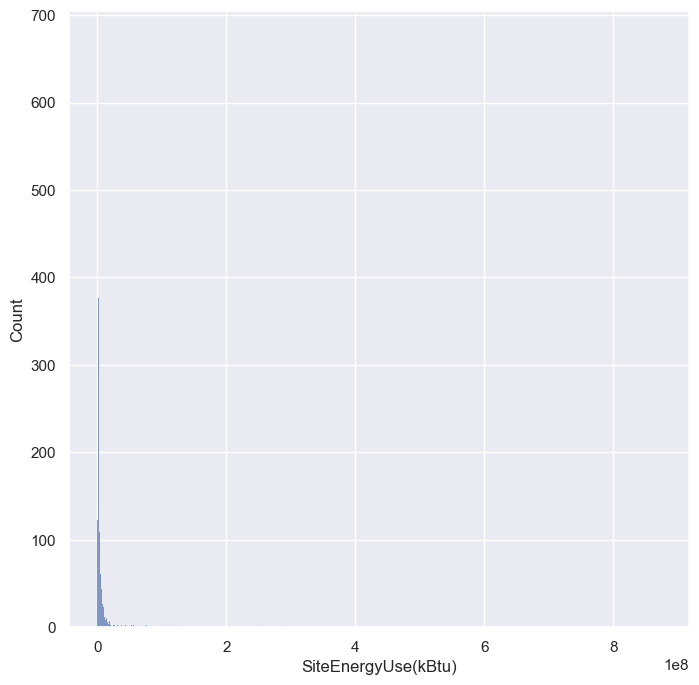

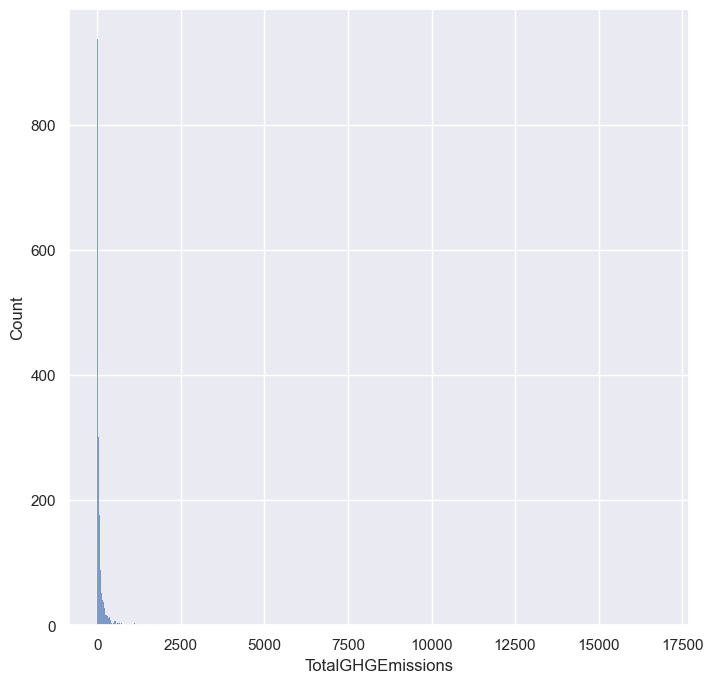

In [97]:
for col in var_target:
    plt.figure(figsize=(8,8))
    sns.histplot(df_0[col])
    plt.show()

In [98]:
df_0['NumberofBuildings'].unique()

array([  1. ,   5. ,   1.5,   2.5,  14. ,   2. ,   3.5,  11. ,  15. ,
         4. ,   3. ,   4.5,   8.5,  20. ,   nan,  12. ,  10. ,   6. ,
         5.5,   7.5,   7. , 111. ])

In [99]:
df_0['NumberofBuildings'] = np.ceil(df_0['NumberofBuildings'])
df_0['NumberofBuildings'].unique()

array([  1.,   5.,   2.,   3.,  14.,   4.,  11.,  15.,   9.,  20.,  nan,
        12.,  10.,   6.,   8.,   7., 111.])

In [100]:
df_0['NumberofFloors'].unique()

array([12., 11., 41., 10., 18.,  2.,  8., 15.,  6., 25.,  9., 33., 28.,
        5., 19.,  7.,  1.,  3.,  4., 24., 20., 34., nan, 16., 23., 17.,
       36., 22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46.,
       30., 56., 26., 27., 76., 31., 38., 39., 32., 40.])

In [109]:
#Exportation données nettoyées
df_0.to_csv('data_cleaned.csv', index=False)

In [110]:
#Exportation catégories de variable
import json

# as requested in comment
exDict = {'var_id':var_id, 'var_quant':var_quant, 'var_cat':var_cat, 'var_obj':var_obj, 'var_adress':var_adress, 'var_target':var_target}

with open('group_var.txt', 'w') as file:
     file.write(json.dumps(exDict))